# Data Science Milestone 1 Phase 1

by: Muhammad Farhan Zahirsyah

Batch 10

---
### Desctription
Data marketing bank ini terkait dengan kampanye pemasaran langsung (panggilan telepon) dari lembaga perbankan Portugis. Tujuan klasifikasi adalah untuk memprediksi apakah klien akan berlangganan deposito berjangka (variabel y).



### Objective
- Memprediksi apakah costumer bank sudah berlangganan deposito berjangka
- Melakukan pemodelan dengan menggunakan algoritma yang berbeda
- Melakukan cross validation pada model
- Mencari hyperparameter terbaik dari model dengan cross validation terbaik
- Implementasi model pada data inference

### Problem Statement
- bagaimana cara memprediksi apakah costumer bank sudah berlangganan deposito berjangka
- bagaimana cara melakukan pemodelan dengan menggunakan algoritma yang berbeda
- bagaimana cara Melakukan cross validation pada model
- bagaimana cara Mencari hyperparameter terbaik dari model dengan cross validation terbaik
- bagaimana cara Implementasi model pada data inference


---
### Dataset Feature Desctiption
berikut adalah deskripsi dataset 

bank client data:

|name | description |
|---|---|
|1 - age |(numeric) |
|2 - job :| type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student',|'technician','unemployed','unknown') |
|3 - marital : |marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)|
|4 - education| (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')|
|5 - default:| has credit in default? (categorical: 'no','yes','unknown')|
|6 - housing:| has housing loan? (categorical: 'no','yes','unknown')|
|7 - loan:| has personal loan? (categorical: 'no','yes','unknown')|

related with the last contact of the current campaign:

|name | description |
|---|---|
|8 - contact:| contact communication type (categorical: 'cellular','telephone')|
|9 - month:| last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')|
|10 - day_of_week:| last contact day of the week (categorical: 'mon','tue','wed','thu','fri')|
|11 - duration:| last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.|

dijelaskan di sini bahwa feature duration harus dibuang jika dataset ini mau digunakan untuk membuat prediksi model yang realistis.

other attributes:

|name | description |
|---|---|
|12 - campaign:| number of contacts performed during this campaign and for this client (numeric, includes last contact)|
|13 - pdays: |number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)|
|14 - previous: |number of contacts performed before this campaign and for this client (numeric)|
|15 - poutcome:| outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')|

social and economic context attributes

|name | description |
|---|---|
|16 - emp.var.rate:| employment variation rate - quarterly indicator (numeric)|
|17 - cons.price.idx:| consumer price index - monthly indicator (numeric)|
|18 - cons.conf.idx:| consumer confidence index - monthly indicator (numeric)|
|19 - euribor3m:| euribor 3 month rate - daily indicator (numeric)|
|20 - nr.employed:| number of employees - quarterly indicator (numeric)|

Output variable (desired target):

|name | description |
|---|---|
|21 - y - |has the client subscribed a term deposit? (binary: 'yes','no')|

## I. Import Library

In [1]:
# essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import statsmodels.api as sm
import sklearn

# scikit-learn library model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
# xgboost libarary model
from xgboost import XGBClassifier
# catboost library model
from catboost import CatBoostClassifier


# scikit-learn library model selection & preprocess
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,OrdinalEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer

# scikit-learn library pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV

#scikit-learn library model evaluation
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

# removing warnings in cell
import warnings
warnings.filterwarnings('ignore')

# capping outlier library winsorizer
from feature_engine.outliers import Winsorizer, OutlierTrimmer

Memangil version, apabila program ini digunakan di masa mendatang kemungkinan library sudah ada pembaharuan dan versi yang digunakan sekarang sudah deprecated

In [2]:
print('Pandas Version     :',pd.__version__)
print('Numpy Version      :',np.__version__)
print('Statsmodels Version:',sm.__version__)
print('Matplotlib Version :',matplotlib.__version__)
print('Seaborn Version    :',sns.__version__)
print('Sklearn Version    :',sklearn.__version__)

Pandas Version     : 1.3.4
Numpy Version      : 1.20.3
Statsmodels Version: 0.12.2
Matplotlib Version : 3.4.3
Seaborn Version    : 0.11.2
Sklearn Version    : 0.24.2


## II. Data Loading

mengambil dataset dari path lokal

In [3]:
bank_df_ori = pd.read_csv('bank-additional-full.csv',sep=';')

In [4]:
bank_df_ori.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


diatas adalah 5 baris pertama dataset

In [5]:
bank_df_ori.head(5).T

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


Diatas menampilkan 3 data teratas dengan menampilkan nama seluruh kolom

In [6]:
bank_df_ori.shape

(41188, 21)

Terdapat 41188 baris dengan  21 kolom

In [7]:
bank_df_ori.select_dtypes(include=np.number).describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


- pada kolom p days nilai quartil dan max semuanya 999 ini harus diselidiki lebih lanjut
- pada kolom previous nilai quartil semuanya 0 dan max 7 harus diselidiki lebih lanjut


In [8]:
bank_df_ori.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
job,41188,12,admin.,10422
marital,41188,4,married,24928
education,41188,8,university.degree,12168
default,41188,3,no,32588
housing,41188,3,yes,21576
loan,41188,3,no,33950
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623
poutcome,41188,3,nonexistent,35563


terdapat 11 kolom ber data type categorical, dengan frequensi target label 'y' no banyak sekali 36548 dari 41188 kemungkinan data akan timpang

In [9]:
for i in bank_df_ori.select_dtypes(include=['object']):
    print(i)
    print(bank_df_ori[i].unique())
    print("-"*50)

job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
--------------------------------------------------
marital
['married' 'single' 'divorced' 'unknown']
--------------------------------------------------
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
--------------------------------------------------
default
['no' 'unknown' 'yes']
--------------------------------------------------
housing
['no' 'yes' 'unknown']
--------------------------------------------------
loan
['no' 'yes' 'unknown']
--------------------------------------------------
contact
['telephone' 'cellular']
--------------------------------------------------
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
--------------------------------------------------
day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
----------------------------

Diatas adalah isi dari kolom yang berdatatypes categorical

In [10]:
bank_df_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

tidak ada missing value bertipe np.Nan

In [11]:
bank_df_ori.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## III. Exploratory Data Analysis

In [12]:
print(bank_df_ori['y'].value_counts())
print('-'*50)
print('percentage yes/no: \n',(bank_df_ori['y'].value_counts()/len(bank_df_ori))*100)
print('-'*50)
print('percentage null: \n',(bank_df_ori['y'].isnull().sum()/len(bank_df_ori))*100)

no     36548
yes     4640
Name: y, dtype: int64
--------------------------------------------------
percentage yes/no: 
 no     88.734583
yes    11.265417
Name: y, dtype: float64
--------------------------------------------------
percentage null: 
 0.0


setelah diliat pada target dataset terdapat **Inbalance** terhadap jawaban yes dan no, 88.73% pada posisi no dan 11.26% pada posisi yes. apabila nilai ini dilakukan split yang tidak balance, kemungkinan model akan menjadi tidak balance. 

<AxesSubplot:xlabel='y', ylabel='count'>

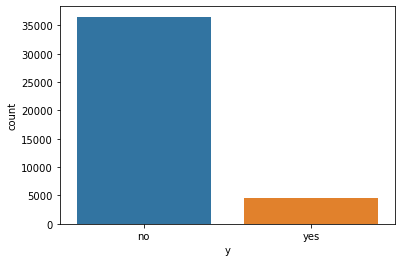

In [13]:
sns.countplot(x='y',data=bank_df_ori)

Dilihat dari diagram diatas terlihat barchart yang timpang antara yes dan no. 

karena tidak ada missing value pada target data maka diambil sample 10 dari dataset untuk dijadikan data inference

In [14]:
data_inf = bank_df_ori.sample(10,random_state=1)
data_inf

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
35577,32,blue-collar,married,basic.9y,unknown,yes,yes,cellular,may,mon,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,no
13950,33,blue-collar,single,basic.6y,unknown,yes,yes,cellular,jul,fri,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
29451,25,self-employed,divorced,university.degree,no,yes,no,cellular,apr,mon,...,5,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,yes
32295,34,blue-collar,single,high.school,no,yes,no,cellular,may,fri,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
27477,53,technician,married,professional.course,no,yes,no,cellular,nov,fri,...,7,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no
31507,46,services,married,basic.9y,no,no,yes,cellular,may,wed,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1,no
32167,33,technician,single,professional.course,no,yes,no,cellular,may,fri,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
24580,46,technician,married,high.school,no,yes,no,cellular,nov,mon,...,1,999,1,failure,-0.1,93.200,-42.0,4.191,5195.8,no
2954,42,technician,married,professional.course,unknown,no,no,telephone,may,wed,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no
34998,30,services,single,high.school,no,yes,no,cellular,may,fri,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.250,5099.1,no


reset index baik dari data inference maupun data bank

In [15]:
bank_df = bank_df_ori.drop(data_inf.index)
bank_df.reset_index(drop=True,inplace=True)
data_inf.reset_index(drop=True,inplace=True)

ditampilkan data inference

In [16]:
data_inf

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,32,blue-collar,married,basic.9y,unknown,yes,yes,cellular,may,mon,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,no
1,33,blue-collar,single,basic.6y,unknown,yes,yes,cellular,jul,fri,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
2,25,self-employed,divorced,university.degree,no,yes,no,cellular,apr,mon,...,5,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,yes
3,34,blue-collar,single,high.school,no,yes,no,cellular,may,fri,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
4,53,technician,married,professional.course,no,yes,no,cellular,nov,fri,...,7,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no
5,46,services,married,basic.9y,no,no,yes,cellular,may,wed,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1,no
6,33,technician,single,professional.course,no,yes,no,cellular,may,fri,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
7,46,technician,married,high.school,no,yes,no,cellular,nov,mon,...,1,999,1,failure,-0.1,93.200,-42.0,4.191,5195.8,no
8,42,technician,married,professional.course,unknown,no,no,telephone,may,wed,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no
9,30,services,single,high.school,no,yes,no,cellular,may,fri,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.250,5099.1,no


melakukan pengecekan scatter data antar feature numerik dengan pairplot

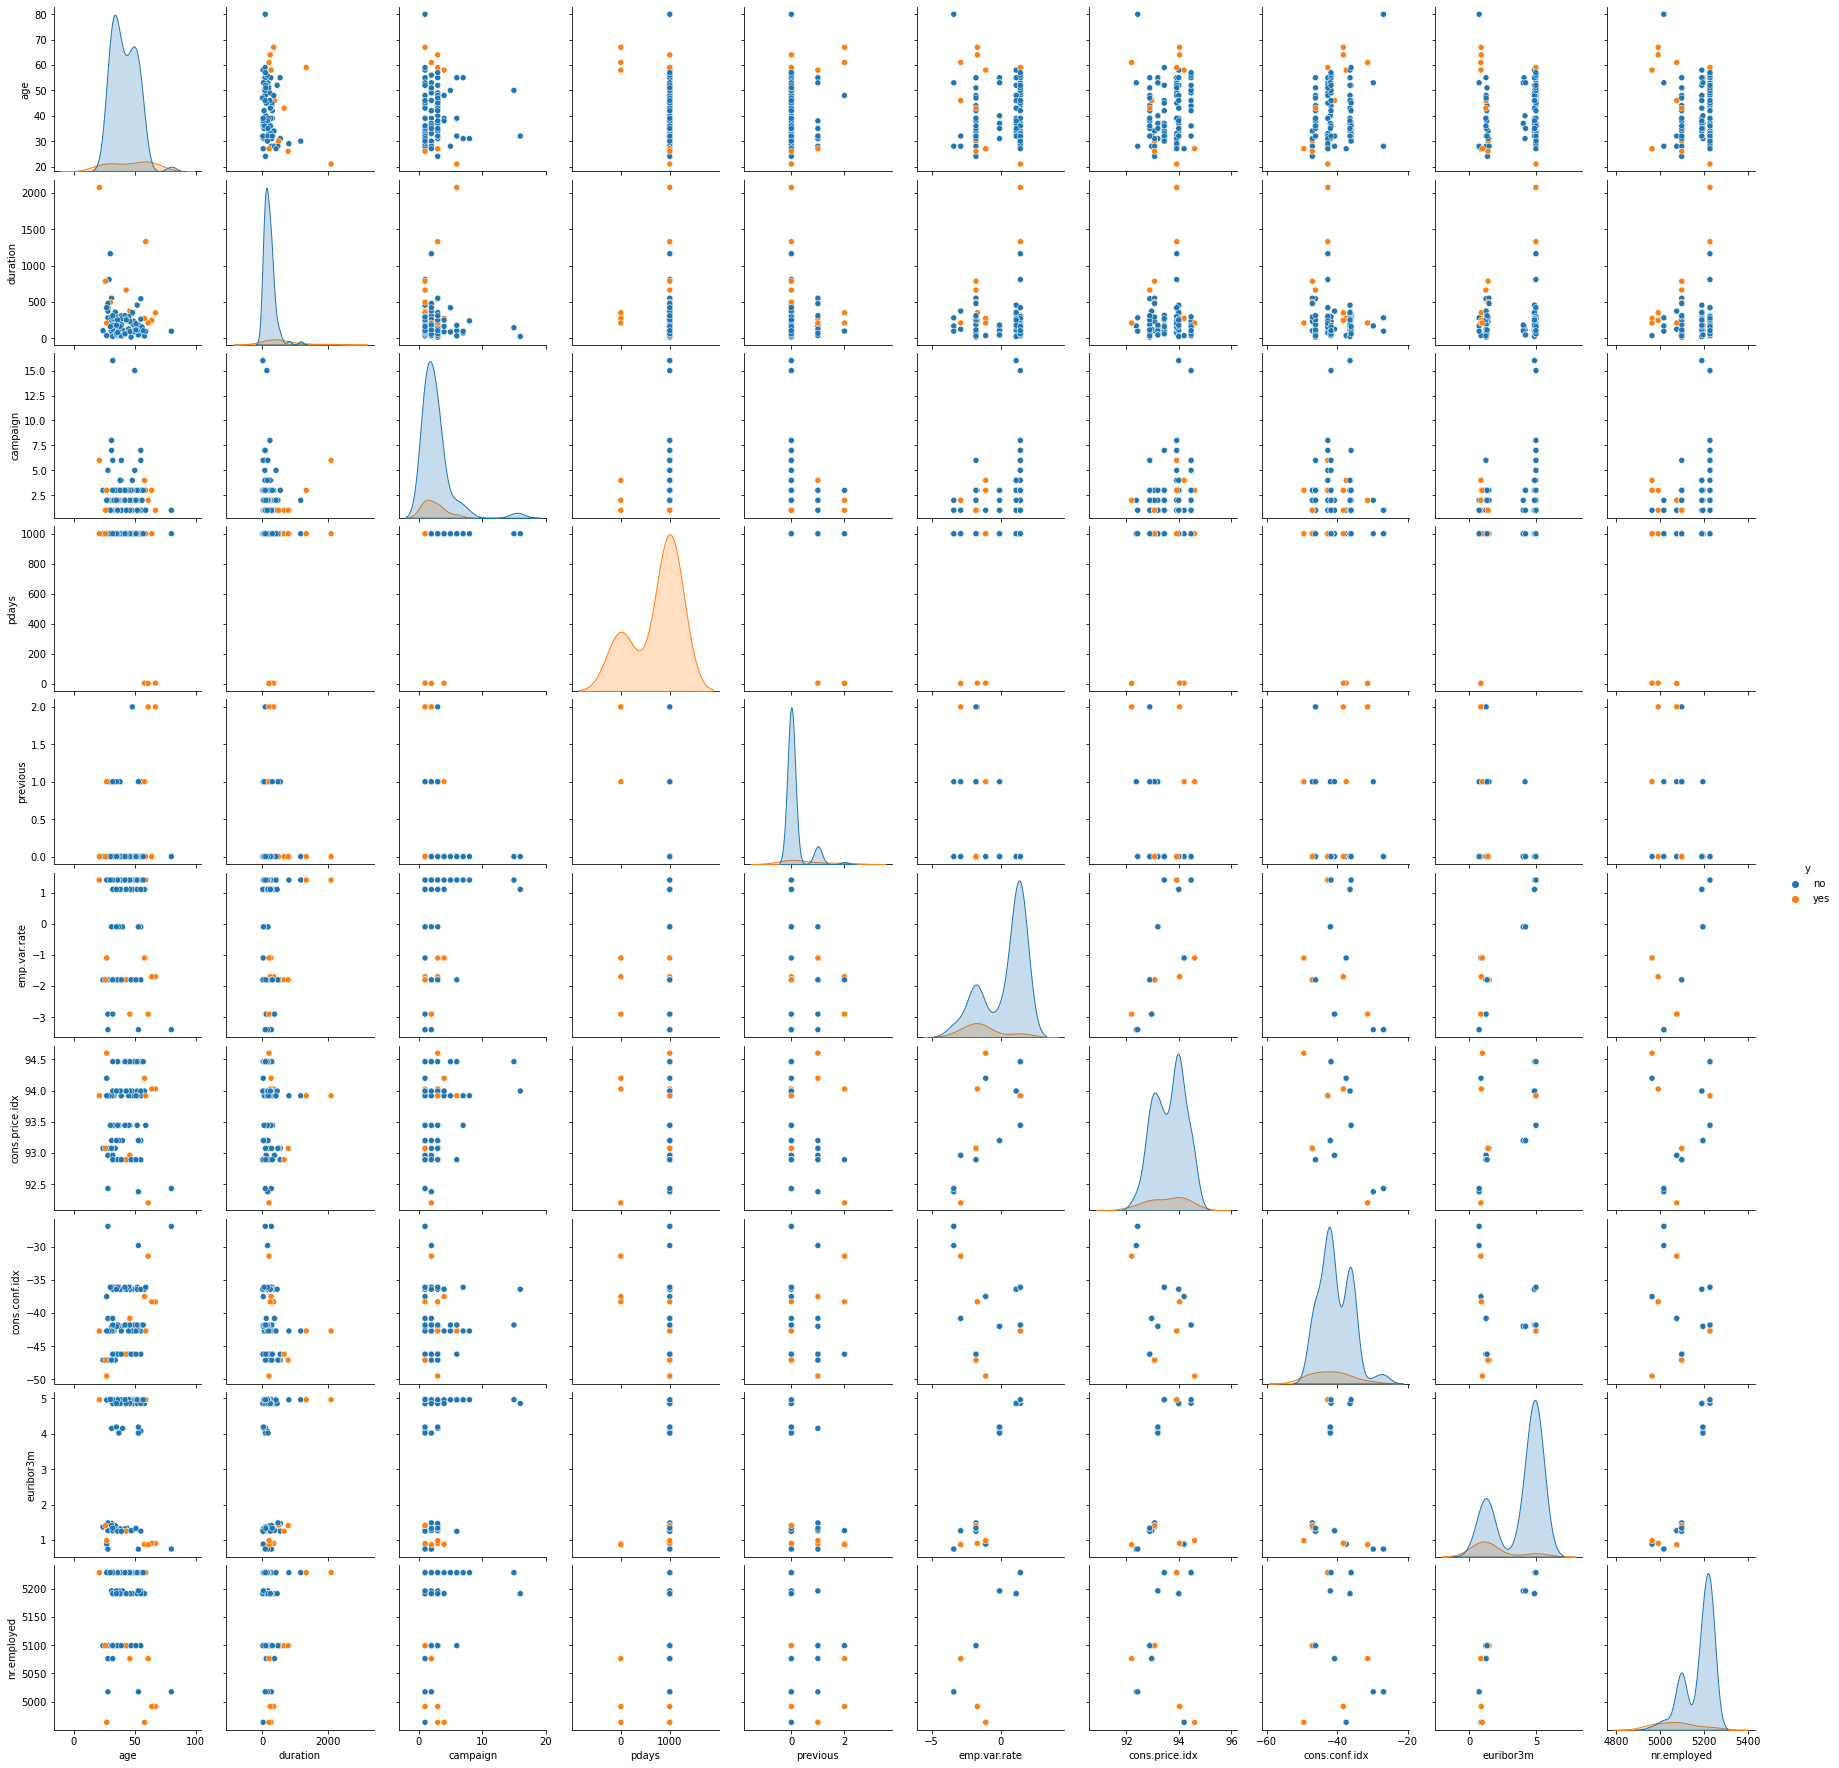

In [17]:
sns.pairplot(bank_df.sample(100),hue='y')

yang paling unik ada pada scatter plot pdays. pada kolom ini sebarannya ada di titik 0 dna 1000 sepertinya sesuai dengan deskripsi dataset bahwa pdays memiliki nilai 999 yang artinya client belum pernah dihubungi sebelumnya. 

untuk mendapatkan informasi yang lebih dalam, saya melakukan pengecekan distribusi tiap feature numerik

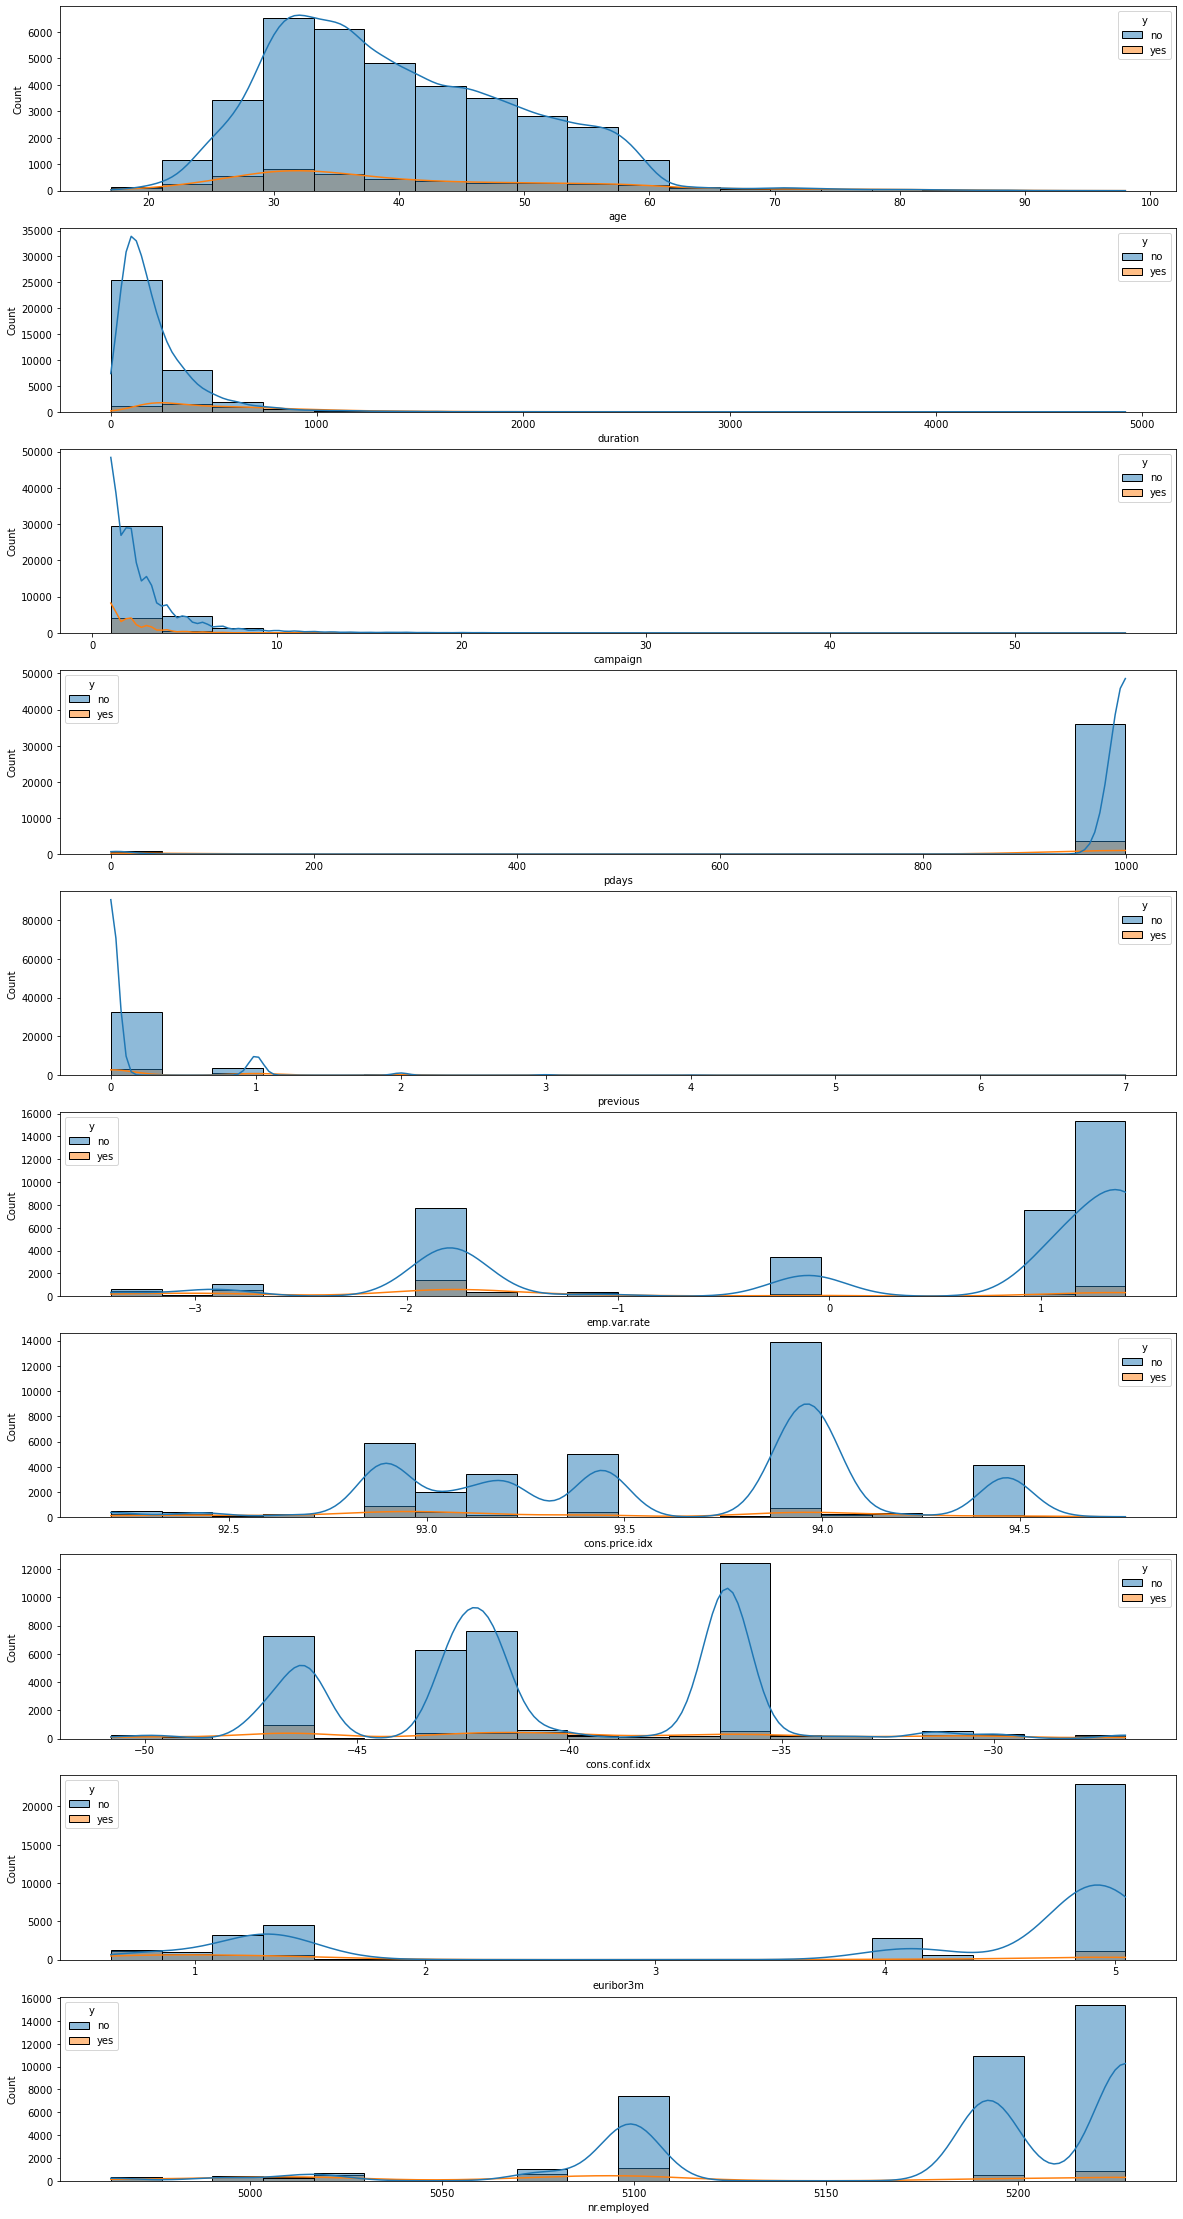

In [18]:
j=0
fig, ax = plt.subplots(10,1,figsize=(20,40))
for i in bank_df.select_dtypes(include=np.number):
    sns.histplot(x=i,data=bank_df,hue='y',ax=ax[j],kde=True, bins=20)
    j+=1
plt.show(fig)


distribusi yang terlihat bagus hanya ada pada feature age, duration,dan campaign sisanya tidak terlalu terlihat distribusinya dari visualisasi data. namun bila dilihat dari skew mungkin akan berbeda. 

dan yang paling menarik perhatian adalah pdays. kebanyakan distribusinya ada pada sekitar nilai 1000, bila dilihat dari datanya memang ada data 999 yang berarti client belum pernah dihubungi sebelumnya. 

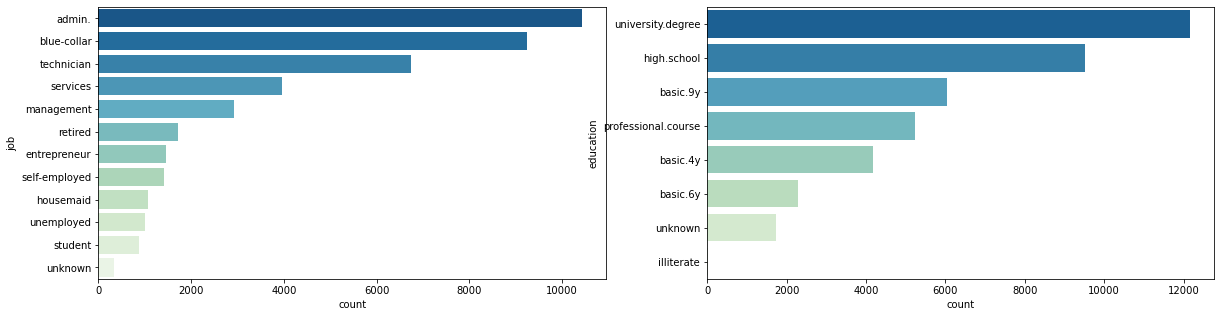

In [19]:
fig, ax= plt.subplots(1,2,figsize=(20,5))
sns.countplot(y='job',data=bank_df,orient='h',ax=ax[0],palette='GnBu_r',order=bank_df['job'].value_counts().index)

sns.countplot(y='education',data=bank_df,orient='h',ax=ax[1],palette='GnBu_r',order=bank_df['education'].value_counts().index)
plt.show()

dilihat dari plot diatas untuk feature "job" banyak sekali yang menjadi admin dan ada kolom unknown didalamnya. kategori ini akan dianggap sebagai missing value

untuk feature education, dataset memiliki responden yang memiliki tingkat edukasi hingga universitas yang paling banyak dan ada kolom unknown juga pada feature ini. unknown akan dianggap sebagai missing value



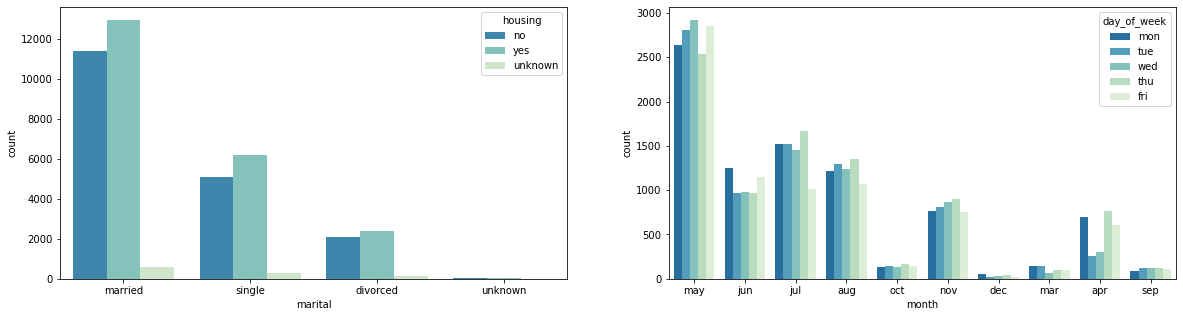

In [20]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.countplot(x='marital',data=bank_df,ax=ax[0],palette='GnBu_r',order=bank_df['marital'].value_counts().index,hue='housing')
sns.countplot(x='month',data=bank_df,ax=ax[1],palette='GnBu_r',hue='day_of_week')
plt.show()

dari feature marital kita bisa tau bahwa setiap marital status kebanyakan memiliki rumah sendiri daripada yang tidak punya

dari feature month kita dapat melihat jumlah data yang paling banyak ada pada bulan mei dan paling sedikit pada bulan desember

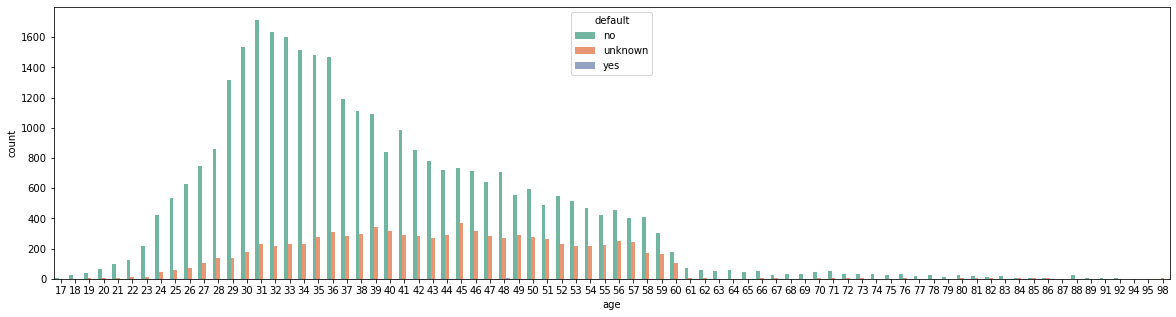

In [21]:
fig = plt.figure(figsize=(20,5))
sns.countplot(x='age',data=bank_df,palette='Set2',hue='default')
plt.show()

diatas adalah plot umur dengan apakah orang tersebut memiliki riwayat kredit macet. untuk kategori unknown sangat banyak dan yes hampir tidak ada. terlihat bahwa target pasar untuk bank ini kebanyakan pada orang berumur 24an hingga 60

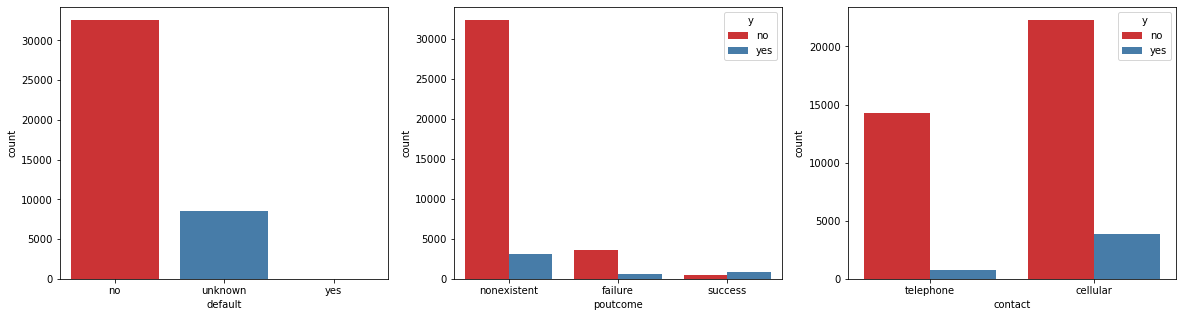

In [22]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
sns.countplot(x='default',data=bank_df,palette='Set1',ax=ax[0])
sns.countplot(x='poutcome',data=bank_df,hue='y',palette='Set1',ax=ax[1])
sns.countplot(x='contact',data=bank_df,hue='y',palette='Set1',ax=ax[2])
plt.show()



karena kategori yes pada default tidak terlihat pada plot sebelumnya maka dilakukan plot sendiri untuk melihat yes nya. dari plot ini juga tidak terlihat ada kategori yes dari feature default.

terlihat pada kolom poutcome banyak sekali data yang non existent artinya banyak missing value. bila dilakukan imputasi ini juga, feature ini menjadi lebih dari 60% adalah hasil imputasi, sehingga model bisa menjadi bias.

selanjutnya dalam deskripsi dataset terdapat penjelasan seperti ini:

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

maka kita lihat kolom duration bernilai 0

In [23]:
bank_df[bank_df['duration'] == 0]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
6250,39,admin.,married,high.school,no,yes,no,telephone,may,tue,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
23029,59,management,married,university.degree,no,yes,no,cellular,aug,tue,...,10,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
28059,53,blue-collar,divorced,high.school,no,yes,no,cellular,apr,fri,...,3,999,0,nonexistent,-1.8,93.075,-47.1,1.479,5099.1,no
33007,31,blue-collar,married,basic.9y,no,no,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no


ternyata hanya ada 4 baris yang bernilai 0, artinya sudah pasti target akan bernilai "no"

setelah dilihat kolom feature duration hanya memiliki 4 kolom yang bernilai 0, sesuai dengan deksripsi bahwa duration tidak dapat dimasukan kedalam model karena duration ada apabila orang tersebut telah ditelfon. bila kita mau mempredict apakah klien subscribe atau tidak, seharusya kita tidak bisa tau berapa lama kita menelfon pelanggan, maka untuk keperluan pembuatan model kolom ini harus di drop untuk membuat model yang realistis.

In [24]:
bank_df.drop(columns=['duration'],inplace=True)

## IV. Data Preprocessing

### A. Split data

melakukan train test split pada data complete untuk dibagi menjadi data train dan data test

In [25]:
x = bank_df.drop(['y'],axis=1)
y = bank_df['y']


x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=1,stratify=y)
print(x_train.shape)
print(x_test.shape)

(32942, 19)
(8236, 19)


data dibagi menjadi 80% untuk train dan 20% untuk test, dengan menggunakan parameter stratify=y maka diharapkan pembagian yes dan no akan sama rasionya seperti populasi +-88% no dan +-11% pada data test dan data training.

memilih kolom yang numerikal

In [26]:
num_columns = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate','cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
num_columns

['age',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

memilih kolom yang kateorikal

In [27]:
obj_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','month', 'day_of_week', 'poutcome']
obj_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

## V. Outlier Handling

Dalam melakukan outlier handling ada beberapa tahapan yang peneliti lakukan untuk mendapatkan data yang bersih. rangkuman tahapan cleaning data adalah sebagai berikut:

- membuat tabel treatment, ini digunakan untuk mengetahui distibusi, lcl, ucl dan treatment yang bisa dilakukan kepada data train untuk dilakukan outlier handling.
- melakukan outlier handling pada data yang normal dan harus di capping dengan cara winsorizer
- melakukan outlier handling pada data yang harus di trim dengan outlier trimmer

untuk lebih jelasnya maka akan dilakukan sama seperti dengan tahapan diatas


### A. Outliers Function

In [28]:
# membuat fungsi untuk data yang skew dan dilakukan pencarian batas bawah dan batas atas menggunakan IQR
def iqr(data,column):
    lower_limit= data[column].quantile(0.25) - 3*(data[column].quantile(0.75)-data[column].quantile(0.25))
    upper_limit= data[column].quantile(0.75) + 3*(data[column].quantile(0.75)-data[column].quantile(0.25))
    return lower_limit, upper_limit

# membuat fungsi untuk data yang berdistribusi normal untuk mencari batas atas dan batas bawah menggunakan standard deviasi.
def lcl_ucl_std(data,column):
    lcl = data[column].mean() - 1.5*data[column].std()
    ucl = data[column].mean() + 1.5*data[column].std()
    return lcl,ucl

# membuat fungsi untuk mengetahui berapa banyak persentase outliers untuk masing-masing distribusi yang skewed dan normal. 
# bila tidak terdapat outliers dari kolom tersebut maka nilainya akan menjadi 0
def perc_outliers_iqr(data,column):
    lcl,ucl = iqr(data,column)
    try:
        result = data[column][(data[column]<=lcl) | (data[column]>=ucl)].count()/len(data[column])
    except:
        result = 0
    return result

def perc_outliers_std(data,column):
    lcl,ucl = lcl_ucl_std(data,column)
    try:
        result = data[column][(data[column]<=lcl) | (data[column]>=ucl)].count()/len(data[column])
    except:
        result = 0
    return result
    
# membuat fungsi untuk menyatukan fungsi IQR dan std deviasi. dengan pemilihan fungsi dilihat dari skewness data. 
# apabila diatas -0.5 dan dibawah 0.5 maka data tersebut berdistribusi normal. 
# sedangkan diluar dari nilai tersebut maka data berdistribusi skew
def outliers(data,column,distr):
    if distr <= -0.5 or distr >= 0.5:
        lcl,ucl = iqr(data,column)
        percentage = perc_outliers_iqr(data,column)
    elif distr > -0.5 or distr < 0.5:
        lcl,ucl = lcl_ucl_std(data,column)
        percentage = perc_outliers_std(data,column)
    return lcl,ucl,percentage

>if a data point is below Q1 − 1.5×IQR or above Q3 + 1.5×IQR, it is viewed as being too far from the central values to be reasonable. and if If your assignment is having you consider not only outliers but also "extreme values", then the values for Q1 − 1.5×IQR and Q3 + 1.5×IQR are the "inner" fences and the values for Q1 − 3×IQR and Q3 + 3×IQR are the "outer" fences.[1]

agar data tidak banyak yang keluar dari range iqr maka saya mengambil 3xIQR yang didalamnya juga memasukan nilai ekstrim.

### B. Creating Treatment Table

untuk mempermudah kolom mana saja yang skew atau normal dan treatment apa saja yang harus dilakukan, saya membuat tabel treatment yang isi nya adalah kolom-kolom numerik dengan deskripsi sebagai berikut:

|Nama Kolom | Deskripsi |
|---|---|
|name| nama kolom numerik|
| distr| nilai skew distribusi|
|percentage| persentasi jumlah outlier yang diluar dari batas bawah dan batas atas|
|skewness| nama distribusi |
|lcl| lower control limit/ batas bawah|
|ucl| upper control limit/ batas atas|
|treatment| treatment yang harus dilakukan|

In [29]:
# menambah data kolom skew pada kolom numerik x_train
skew = []
for i in x_train[num_columns]:
    skew.append(x_train[i].skew())
# menambah data kolom percentage dengan menggunakan fungsi outliers
percentage = []
j = 0
for i in x_train[num_columns]:
    percentage.append(outliers(x_train,i,skew[j])[2])
    j += 1

# menambah kolom treatment untuk mengetahui treatment apa yg harus dilakukan terhadap feature
treatment = []
j=0
for i in x_train[num_columns]:
    if percentage[j] == 0:
        treatment.append('No outliers')
    elif percentage[j] <= 0.05:
        treatment.append('trim')
    elif percentage[j] <= 0.15:
        treatment.append('capping')
    elif percentage[j] > 0.15:
        treatment.append('do not treat')
    j += 1

# menambah data kolom lcl dengan menggunakna fungsi outliers
lcl = []
j = 0
for i in x_train[num_columns]:
    lcl.append(outliers(x_train,i,skew[j])[0])
    j += 1
# menambah data kolom ucl dengan menggunakan fungsi outliers
ucl = []
j = 0
for i in x_train[num_columns]:
    ucl.append(outliers(x_train,i,skew[j])[1])
    j += 1


# menambah kolom distribution dengan melihat nilai skewed. 
# bila didalam nilai -0.5 sampai 0.5 maka berdistribusi normal. diluar nilai tersebut maka berdistribusi skewed
distribution = []
j = 0
for i in x_train[num_columns]:
    if skew[j] >= -0.5 and skew[j] <= 0.5:
        distribution.append('normal')
    else: 
        distribution.append('skewed')
    j += 1

# membuat dataframe dengan variabel outlier_treatment untuk menjadi rangka tabel treatment
outlier_treatment = pd.DataFrame()
outlier_treatment['name'] = x_train[num_columns].columns
outlier_treatment['distr'] = distribution
outlier_treatment['percentage'] = percentage
outlier_treatment['skewness'] = skew
outlier_treatment['lcl'] = lcl
outlier_treatment['ucl'] = ucl
outlier_treatment['treatment'] = treatment

pada kolom percentage yang nilainya 0 itu didapatkan dari fungsi outliers. telah dijelaskan pada markdown fungsi oultiers bahwa 0 merupakan tidak ada outliers. 

nilai percentage outliers dibawah 0.05 atau 5% dari kolom data artinya kita bisa membuang data tersebut. 

nilai percentage outliers diatas 5% sampai 15% dari kolom data artinya kita bisa melakukan capping pada data tersebut.

nilai percentage outliers diatas 15% dari kolom data artinya kita harus membiarkan data tersetbut. karena bisa jadi ini bukanlah anomali outliers.

In [30]:
outlier_treatment

,name,distr,percentage,skewness,lcl,ucl,treatment
0,age,skewed,0.000243,0.789944,-13.000000,92.000000,trim
1,campaign,skewed,0.033119,4.900831,-5.000000,9.000000,trim
2,pdays,skewed,1.000000,-4.865482,999.000000,999.000000,do not treat
3,previous,skewed,1.000000,3.839289,0.000000,0.000000,do not treat
4,emp.var.rate,skewed,0.000000,-0.722321,-11.400000,11.000000,No outliers
5,cons.price.idx,normal,0.162832,-0.230047,92.704939,94.441892,do not treat
6,cons.conf.idx,normal,0.064325,0.305805,-47.448674,-33.538448,capping
7,euribor3m,skewed,0.000000,-0.707327,-9.507000,15.812000,No outliers
8,nr.employed,skewed,0.000000,-1.041849,4712.100000,5615.100000,No outliers


terlihat diatas adalah summary kolom numerical yang akan ditreatment outliersnya. 

### C. Executing Outliers

menggunakan fungsi winsorizer dimasukanlah kolom yang berdistribusi normal dan harus ditreatment capping

In [31]:
capping_norm = outlier_treatment[(outlier_treatment['treatment'] == 'capping') & (outlier_treatment['distr'] == 'normal')]
capping_norm

,name,distr,percentage,skewness,lcl,ucl,treatment
6,cons.conf.idx,normal,0.064325,0.305805,-47.448674,-33.538448,capping


query untuk kolom numerikal yang berdistribusi normal dan harus dicapping

In [32]:
capping_norm['name'].unique().tolist()

['cons.conf.idx']

mengambil nama yang berdistribusi normal dan harus dicapping

In [33]:
windsoriser = Winsorizer(capping_method='gaussian', # choose gaussian for mean and std
                          tail='both', # cap both tails 
                          fold=1.5,
                          variables=['cons.conf.idx'],
                            missing_values='ignore')

windsoriser.fit(x_train)
x_train_cap_norm = windsoriser.transform(x_train)

melakukan capping dengan menggunakan winsorizer untuk data yang yang berdistribusi normal dan harus dicapping. data yang diambil adalah x train

In [34]:
 y_train_trim = y_train.copy()
 x_train_cap_norm = pd.concat([x_train_cap_norm,y_train_trim],axis=1)

sebelum masuk ke trimming dilakukan terlebih dahulu sambungan dengan y_train ini digunakan agar jumlah data dari x_train dan y_tran akan tetap sama meskipun telah di trimming

In [35]:
trim = outlier_treatment[outlier_treatment['treatment'] == 'trim']
trim.reset_index(drop=True, inplace=True)
trim

,name,distr,percentage,skewness,lcl,ucl,treatment
0,age,skewed,0.000243,0.789944,-13.0,92.0,trim
1,campaign,skewed,0.033119,4.900831,-5.0,9.0,trim


In [36]:
trimmer = OutlierTrimmer(capping_method='iqr',
                        tail= 'both',
                        fold=3,
                        variables=['age', 'campaign'],
                        missing_values='ignore')

x_train_outlier_clean = trimmer.fit(x_train_cap_norm)
x_train_outlier_clean = trimmer.transform(x_train_cap_norm)

karena dengan metody query tidak bisa ignore Nan maka dibuat nilai dummy senilai -999 yang nilai aslinya tidak mungkin mencapai nilai sebesar itu. kemudian di decode kembali menjadi nilai Nan

diatas adalah query batas atas dan batas bawah dari setiap kolom yang harus di trim. datanya diambil dari setelah dilakukan winsorizer yang berdistribusi normal

In [37]:
y_outlier_clean = x_train_outlier_clean['y']
x_outlier_clean = x_train_outlier_clean.drop(['y'],axis=1,inplace=True)

setelah ditrim maka dipisahkan kembali y_train dengan nama variabel y_outlier_clean.

dengan x_train yang sudah ditreatment menjadi x_outlier_clean

### D. Outliers Handling Summary

In [38]:
print('Before Outlier handling:', x_train.shape)
print('After Outlier handling:', x_train_outlier_clean.shape)
print(f'Ratio Outlier Handing : {x_train_outlier_clean.shape[0]/x_train.shape[0]:.2%}')

Before Outlier handling: (32942, 19)
After Outlier handling: (32083, 19)
Ratio Outlier Handing : 97.39%


summary sebelum outlier handling ada 32942 baris dan 19 kolom dan setelah outlier handling berkurang menjadi 32071 baris dan 19 kolom. dengan persentase data yang masih dipertahankan sebanyak 97.36%


## V. Missing Value Handling

There are three categories of missing data: Missing Completely at Random (MCAR), Missing at Random (MAR), Missing Not at Random (MNAR).
- MCAR — The missing value is missing completely at random. The propensity for a data point to be missing does not have anything to do with its hypothetical value and with the values of other variables.
- MAR — The missing value is missing due to some of the observed data. The propensity for a data point to be missing is not related to missing data, but it is related to some of the observed data.
- MNAR — The missing value is missing not at random. There are reasons for this. Often, the reasons are that the missing value depends on the hypothetical value or it is dependent on another variable’s value.
(Wu, 2019)

Dalam melakukan missing value handling ada beberapa tahapan yang peneliti lakukan untuk mendapatkan data yang bersih. rangkuman tahapan cleaning data adalah sebagai berikut:

- mengubah data kategorical unknown menjadi Nan dan imputasi menggunakan mode
- mengubah data pdays 999 menjadi Nan dan imputasi menggunakan median

melihat ada berapa klasifikasi unknown didalam feature default

In [39]:
x_train_outlier_clean[x_train_outlier_clean['default']=='unknown'].shape

(6638, 19)

melihat ada berapa klasifikasi yes dalam feature default. karena saat EDA tidak terlihat visualisasi yang masuk kedalam kateori yes

In [40]:
x_train_outlier_clean[x_train_outlier_clean['default']=='yes']

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
21578,48,technician,married,professional.course,yes,no,no,cellular,aug,tue,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1
21579,48,technician,married,professional.course,yes,yes,no,cellular,aug,tue,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1


ternyata hanya ada 2 baris saja yang memiliki default yes. default ini akan dilakukan missing value handling pada kategori unknown


selanjutnya karena dalam deskripsinya p days memiliki nilai 999 yang artinya client belumpernah dihubungi maka ini dimasukan sebagai missing value.

In [41]:
x_train_misval = x_train_outlier_clean.copy()
x_train_misval = x_train_misval.replace({'pdays':{999.0:np.nan}})

melakukan pencarian mode untuk kategorical dan median sesuai dengan distribusi featurenya

In [42]:

job_mode = x_train_misval['job'].mode()[0]
marital_mode = x_train_misval['marital'].mode()[0]
education_mode = x_train_misval['education'].mode()[0]
default_mode = x_train_misval['default'].mode()[0]
housing_mode = x_train_misval['housing'].mode()[0]
loan_mode = x_train_misval['loan'].mode()[0]
poutcome_mode = x_train_misval['poutcome'].mode()[0]
pday_median = x_train_misval['pdays'].median()


print('job mode:',job_mode)
print('marital mode:',marital_mode)
print('education mode:',education_mode)
print('default mode:',default_mode)
print('housing mode:',housing_mode)
print('loan mode:',loan_mode)
print('poutcome mode:',poutcome_mode)
print('pday median:',pday_median)


job mode: admin.
marital mode: married
education mode: university.degree
default mode: no
housing mode: yes
loan mode: no
poutcome mode: nonexistent
pday median: 6.0


terlihat modus dari setiap feature kategorical. 

pada poutcome mode terlihat bahwa feature tersebut lebih banyak non existent artinya missing value nya banyak. seperti yang dijelaskan di EDA, kolom tidak akan di imputasi karena missing valuenya sudah terlalu banyak.

kemudian dilakukan imputasi mode pada setiap feature

In [43]:
x_train_replace = x_train_misval.replace({'job':{'unknown':job_mode,},
                                        'marital':{'unknown':marital_mode,},
                                        'education':{'unknown':education_mode,},
                                        'default':{'unknown':default_mode,},
                                        'housing':{'unknown':housing_mode,},
                                        'loan':{'unknown':loan_mode},
                                        'pdays':{np.nan:pday_median}})

setelah diimputasi kita lihat kembali kategori yang ada didalam data

In [44]:
for i in x_train_replace.select_dtypes(include=['object']):
    print(i)
    print(x_train_replace[i].unique())
    print("-"*50)

job
['entrepreneur' 'blue-collar' 'management' 'technician' 'admin.'
 'services' 'housemaid' 'self-employed' 'student' 'unemployed' 'retired']
--------------------------------------------------
marital
['married' 'single' 'divorced']
--------------------------------------------------
education
['high.school' 'basic.6y' 'university.degree' 'professional.course'
 'basic.9y' 'basic.4y' 'illiterate']
--------------------------------------------------
default
['no' 'yes']
--------------------------------------------------
housing
['no' 'yes']
--------------------------------------------------
loan
['yes' 'no']
--------------------------------------------------
contact
['telephone' 'cellular']
--------------------------------------------------
month
['may' 'apr' 'sep' 'aug' 'nov' 'jul' 'mar' 'jun' 'oct' 'dec']
--------------------------------------------------
day_of_week
['fri' 'tue' 'mon' 'wed' 'thu']
--------------------------------------------------
poutcome
['nonexistent' 'success' 'fai

dilihat tidak ada data yang memiliki kategori unknown lagi

In [45]:
x_train_replace

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
7695,39,entrepreneur,married,high.school,no,no,yes,telephone,may,fri,3,6.0,0,nonexistent,1.1,93.994,-36.400000,4.864,5191.0
29171,43,blue-collar,married,basic.6y,no,yes,no,cellular,apr,fri,4,6.0,0,nonexistent,-1.8,93.075,-47.100000,1.405,5099.1
37886,27,management,single,university.degree,no,yes,no,cellular,sep,tue,2,4.0,2,success,-3.4,92.379,-33.538448,0.819,5017.5
21184,45,technician,divorced,university.degree,no,no,no,cellular,aug,mon,2,6.0,0,nonexistent,1.4,93.444,-36.100000,4.963,5228.1
20647,39,technician,married,professional.course,no,no,no,cellular,aug,wed,1,6.0,0,nonexistent,1.4,93.444,-36.100000,4.965,5228.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2373,56,entrepreneur,married,university.degree,no,no,no,telephone,may,tue,1,6.0,0,nonexistent,1.1,93.994,-36.400000,4.856,5191.0
31575,30,admin.,single,professional.course,no,yes,yes,cellular,may,thu,1,6.0,1,failure,-1.8,92.893,-46.200000,1.327,5099.1
37017,26,services,single,high.school,no,no,no,cellular,jul,tue,2,6.0,0,nonexistent,-2.9,92.469,-33.600000,1.044,5076.2
33509,28,services,single,high.school,no,yes,no,cellular,may,tue,4,6.0,0,nonexistent,-1.8,92.893,-46.200000,1.291,5099.1


data train telah selesai di clean

In [46]:
x_train_clean = x_train_replace.copy()
print('jumlah data pada clean train data: ',x_train_clean.shape)
print('jumlah data pada train data awal: ',x_train.shape)
print(f'Ratio all outliers and missing value trimming : {x_train_clean.shape[0]/x_train.shape[0]:.2%}')

jumlah data pada clean train data:  (32083, 19)
jumlah data pada train data awal:  (32942, 19)
Ratio all outliers and missing value trimming : 97.39%


summary setelah dilakukan data cleansing yaitu sebelum dilakukan apa-apa ada 32942 baris dan 19 kolom dan setelah missing value handling berkurang menjadi 32083 baris dan 19 kolom. dengan persentase data yang masih dipertahankan sebanyak 97.39%.

## V. Feature Selecting

### A. Feature Selecting Numerical data types

melihat korelasi feature terhadap target dengan menggunakan heatmap correlation

In [47]:
label_enc = LabelEncoder()
y_train_enc = label_enc.fit_transform(y_train)
y_train_enc = pd.Series(y_train_enc,index=y_train.index)

heatmap_after = x_train_clean.copy()
heatmap_after = pd.concat([heatmap_after, y_train_enc], axis=1)

label encoder digunakan pada y_train untuk mendapatkan hasil 0 dan 1 untuk yes dan no nya pada prediksi apakah orang tersebut mempunyai deposito berjangka atau tidak.

membuat variabel heatmap_after, ini digunakan untuk plotting heatmap korelasi pearson pada x_train_clean

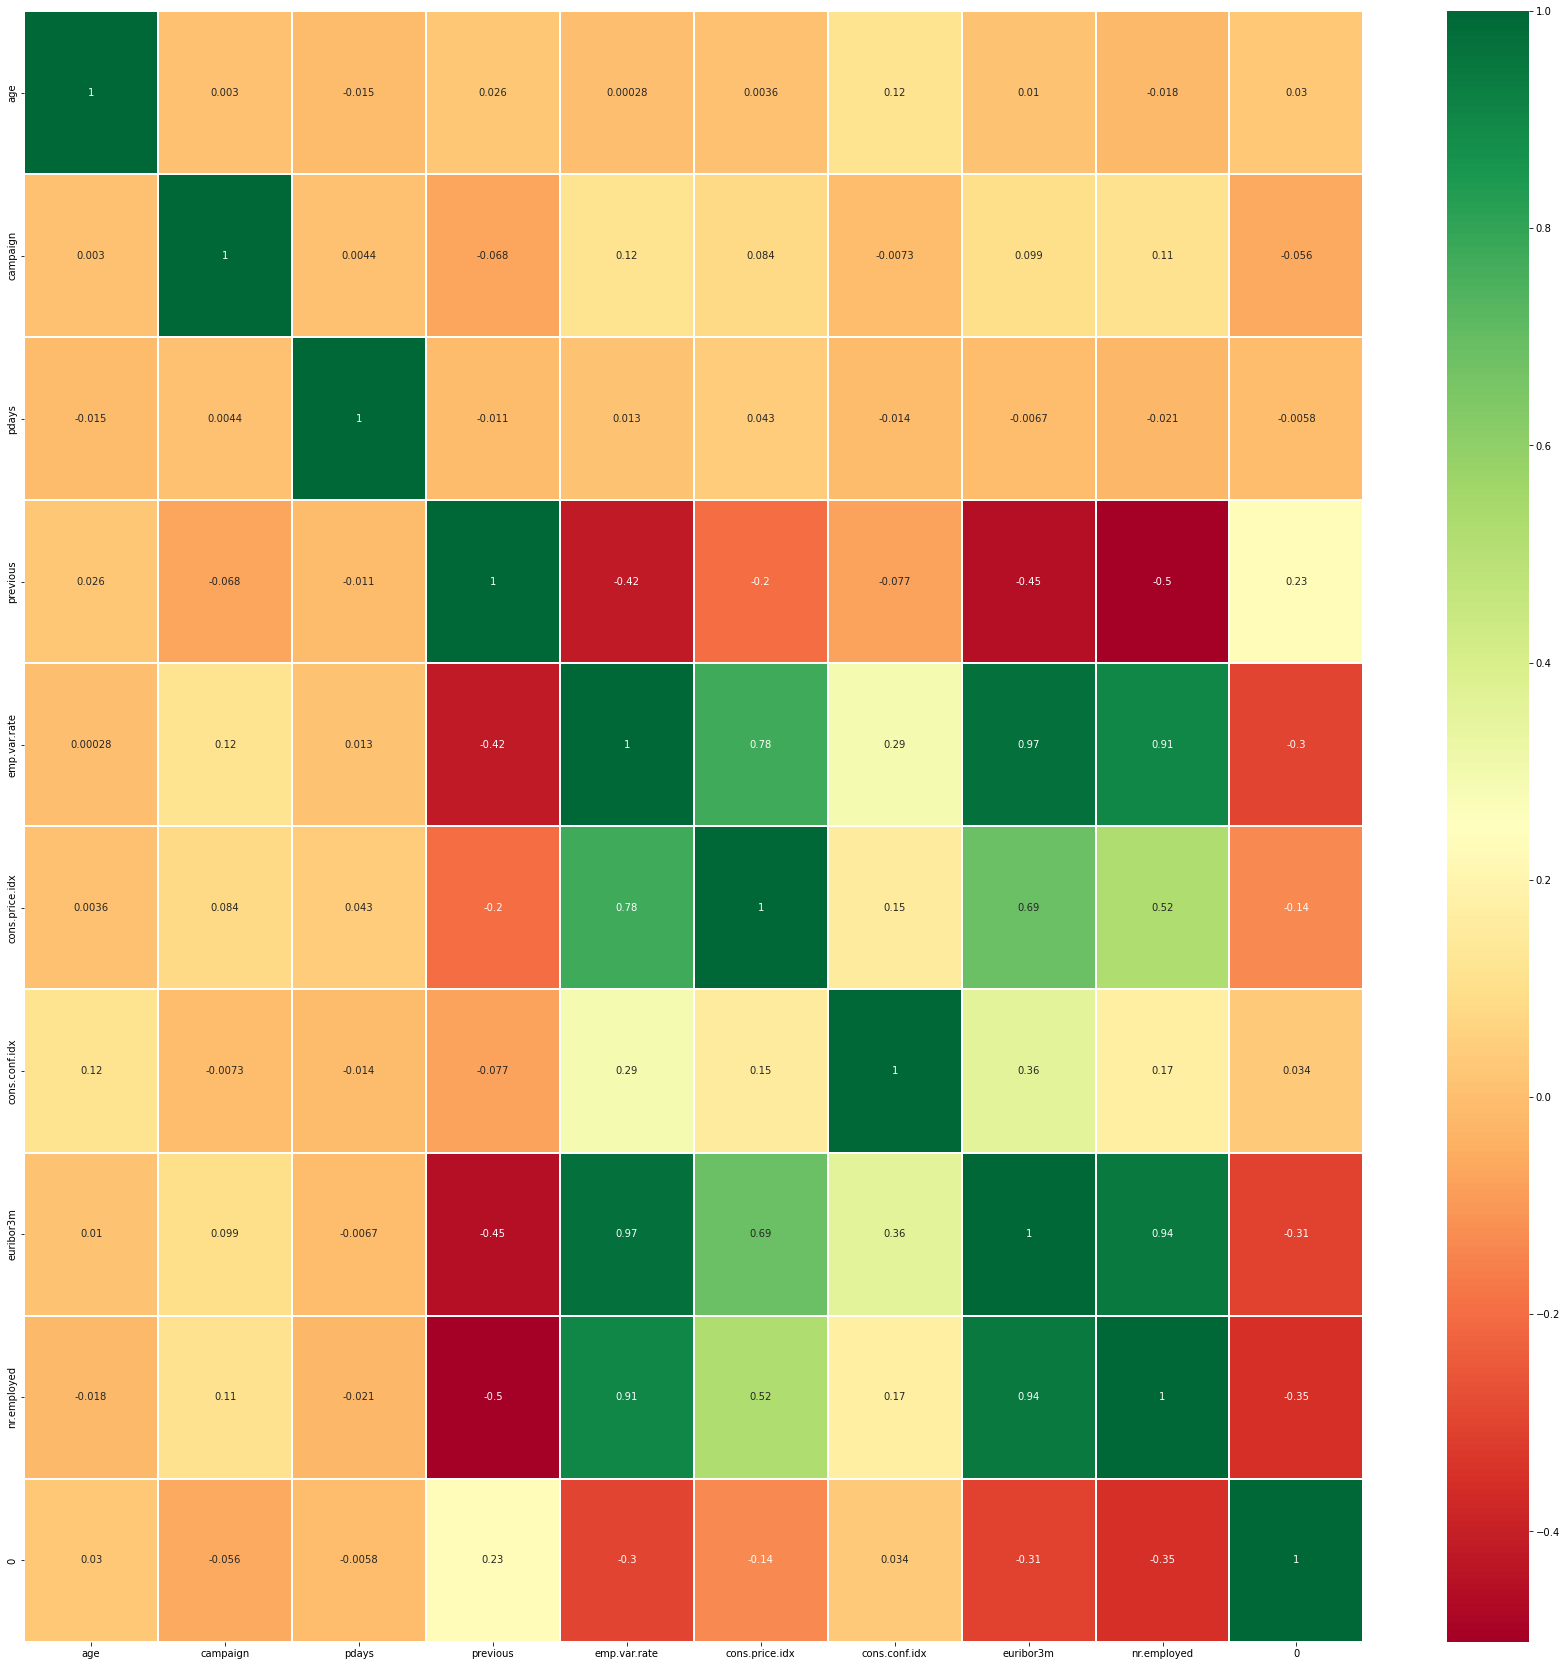

In [48]:
fig2 = plt.figure(figsize=(30,30))
fig2 = sns.heatmap(heatmap_after.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
plt.show()

In [49]:
num_select = ['emp.var.rate','euribor3m','nr.employed','cons.price.idx','previous']
num_select_norm = ['cons.price.idx']
num_select_skew = ['euribor3m','nr.employed','cons.price.idx','previous']

Korelasi Pearson adalah alat analisis statistik yang digunakan untuk melihat keeratan hubungan linier antara 2 variabel yang skala datanya adalah interval atau rasio. Berikut ini adalah interpretasi besarnya nilai koefisien korelasi.
- 0 - 0,2 menyatakan hubungan keeratan sangat lemah,
- 0,2 - 0,4 menyatakan hubungan keeratan lemah,
- 0,4 - 0,7 menyatakan hubungan keeratan cukup kuat,
- 0,7 - 0,9 menyatakan hubungan keeratan kuat,
- 0,9 - 1 menyatakan hubungan keeratan sangat kuat.

Tanda positif dan negatif pada koefisien korelasi menunjukkan arah hubungan. Koefisien korelasi bertanda **positif artinya hubungannya berbanding lurus**, dimana semakin tinggi nilai variabel x maka nilai variabel y juga semakin tinggi dan semakin rendah nilai variabel x maka nilai variabel y juga semakin rendah. Koefisien korelasi bertanda **negatif artinya hubungannya berbanding terbalik**, dimana semakin tinggi nilai variabel x maka nilai variabel y semakin rendah dan semakin rendah nilai variabel x maka nilai variabel y semakin tinggi.[2]

setelah melihat korelasi feature numerik pada heatmap maka diambil korelasi yang berada pada range dibawah -0,1 dan diatas 0.1 maka didapatakanlah ['emp.var.rate','euribor3m','nr.employed','cons.price.idx','previous']

### B. Feature Selecting Categorical data types

melakukan feature selecting categorical yang saya gunakan adalah merubah data categorical tersebut menjadi angka dengan menggunakan ordinal encoder untuk mempermudah melihat korelasi antar feature dan targt label

In [50]:
ord_encoder = OrdinalEncoder()
x_train_ord_enc = x_train_clean.copy()
x_train_ord_enc[obj_columns] = ord_encoder.fit_transform(x_train_ord_enc[obj_columns])

x_train_ord_enc[obj_columns]

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
7695,2.0,1.0,3.0,0.0,0.0,1.0,1.0,6.0,0.0,1.0
29171,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
37886,4.0,2.0,6.0,0.0,1.0,0.0,0.0,9.0,3.0,2.0
21184,9.0,0.0,6.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
20647,9.0,1.0,5.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...
2373,2.0,1.0,6.0,0.0,0.0,0.0,1.0,6.0,3.0,1.0
31575,0.0,2.0,5.0,0.0,1.0,1.0,0.0,6.0,2.0,0.0
37017,7.0,2.0,3.0,0.0,0.0,0.0,0.0,3.0,3.0,1.0
33509,7.0,2.0,3.0,0.0,1.0,0.0,0.0,6.0,3.0,1.0


mempersiapkan target label dengan encoding dengan label encoder kemudian menyatukan tabelnya

In [51]:
label_encoder = LabelEncoder()
y_encoded = y_outlier_clean.copy()
y_encoded = label_encoder.fit_transform(y_encoded)
y_encoded = pd.Series(y_encoded,index=y_outlier_clean.index)

heatmap_category = x_train_ord_enc[obj_columns].copy()
heatmap_category = pd.concat([heatmap_category, y_encoded], axis=1)

kemudian membuat variable heatmap_category untuk dibuatkan koreasi pearson heatmapnya.

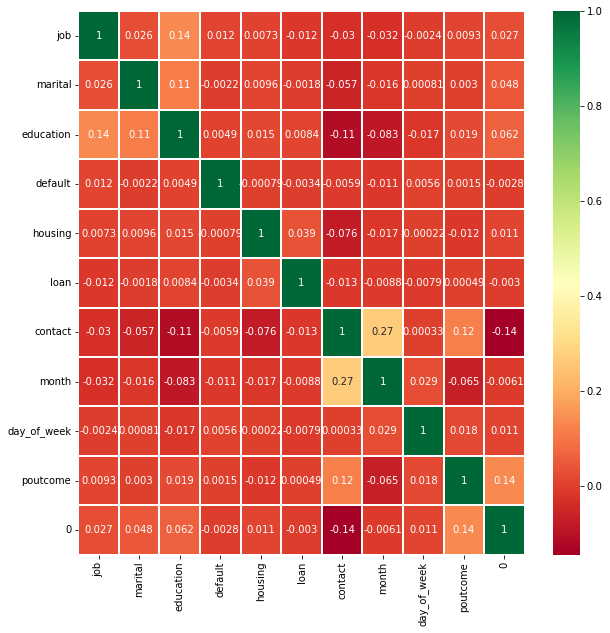

In [52]:
fig3 = plt.figure(figsize=(10,10))
fig3 = sns.heatmap(heatmap_category.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
plt.show()

In [53]:
cat_select = ['contact','poutcome']

karena yang diambil yang berada pada range dibawah -0,1 dan diatas 0.1 maka  di ambil kolom  contact yang bernilai -0.14. menurut saya meskipun nilai korelasinya sangat lemah tapi sudah cukup untuk mempresentasikan kolom dari kategorikal.

### C. Selecting x train

memilih feature ['emp.var.rate','euribor3m','nr.employed','cons.price.idx','previous'] pada x train yang sudah bersih 

In [54]:
x_train_select = x_train_clean[num_select+cat_select]
x_train_select

,emp.var.rate,euribor3m,nr.employed,cons.price.idx,previous,contact,poutcome
7695,1.1,4.864,5191.0,93.994,0,telephone,nonexistent
29171,-1.8,1.405,5099.1,93.075,0,cellular,nonexistent
37886,-3.4,0.819,5017.5,92.379,2,cellular,success
21184,1.4,4.963,5228.1,93.444,0,cellular,nonexistent
20647,1.4,4.965,5228.1,93.444,0,cellular,nonexistent
...,...,...,...,...,...,...,...
2373,1.1,4.856,5191.0,93.994,0,telephone,nonexistent
31575,-1.8,1.327,5099.1,92.893,1,cellular,failure
37017,-2.9,1.044,5076.2,92.469,0,cellular,nonexistent
33509,-1.8,1.291,5099.1,92.893,0,cellular,nonexistent


### D. Selecting X test feature

sebelum data test bisa dipilih feature yang sama dengan data train. penulis melakuakn missing value handling sesuai dengan yang dilakukan pada data train

In [55]:
x_test_select = x_test[num_select+cat_select]
x_test_select

,emp.var.rate,euribor3m,nr.employed,cons.price.idx,previous,contact,poutcome
12289,1.4,4.959,5228.1,93.918,0,telephone,nonexistent
20797,1.4,4.965,5228.1,93.444,0,cellular,nonexistent
9256,1.4,4.967,5228.1,94.465,0,telephone,nonexistent
21631,1.4,4.963,5228.1,93.444,0,cellular,nonexistent
37087,-2.9,0.914,5076.2,92.469,0,telephone,nonexistent
...,...,...,...,...,...,...,...
3314,1.1,4.860,5191.0,93.994,0,telephone,nonexistent
13861,1.4,4.963,5228.1,93.918,0,cellular,nonexistent
8820,1.4,4.866,5228.1,94.465,0,telephone,nonexistent
17394,1.4,4.962,5228.1,93.918,0,cellular,nonexistent


## VI. Model Definition

Melakukan modeling dengan menggunakan pipeline dari beberapa algoritma model.

dilakukan encoding dan scaling menggunakan one hot encoder karena datanya nominal, MinMaxscaler karena distribusi dari numeric yang skewed dan standard scaler untuk yang berdistribusi normal. kemudian dimasukan kedalam column transformer untuk mempermudah scaling dan encoding.

setelah itu dilakukan pipeline untuk kesetiap model yang akan dites

In [56]:
numeric_transformer_skew = MinMaxScaler()
numeric_transformer_norm = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse=False)

# preprocessing numeric features with minmaxscaler
# preprocessing categorical features with OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('skew', numeric_transformer_skew, num_select_skew),
        ('norm', numeric_transformer_norm, num_select_norm),
        ('cat', categorical_transformer, cat_select)
    ])

# membuat 6 model utama dan 2 model tambahan 
clf__logistic = Pipeline(steps=[('preprocessor', preprocessor),('classifier', LogisticRegression(random_state=42))])
clf_svm = Pipeline(steps=[('preprocessor', preprocessor),('classifier', SVC(random_state=42))])
clf_decision_tree = Pipeline(steps=[('preprocessor', preprocessor),('classifier', DecisionTreeClassifier(random_state=42))])
clf_random_forest = Pipeline(steps=[('preprocessor', preprocessor),('classifier', RandomForestClassifier(random_state=42))])
clf_knn = Pipeline(steps=[('preprocessor', preprocessor),('classifier', KNeighborsClassifier())])
clf_gaussian_nb = Pipeline(steps=[('preprocessor', preprocessor),('classifier', GaussianNB())])
clf_catboost = Pipeline(steps=[('preprocessor', preprocessor),('classifier', CatBoostClassifier(random_state=42,verbose=0))])

selain 6 model utama ada 1 model tambahan yang akan dilihat performanya yaitu Catboost

melakukan fit pada train data pada setiap model

In [57]:
clf__logistic.fit(x_train_select, y_outlier_clean)
clf_svm.fit(x_train_select, y_outlier_clean)
clf_decision_tree.fit(x_train_select, y_outlier_clean)
clf_random_forest.fit(x_train_select, y_outlier_clean)
clf_knn.fit(x_train_select, y_outlier_clean)
clf_gaussian_nb.fit(x_train_select, y_outlier_clean)
clf_catboost.fit(x_train_select, y_outlier_clean)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('skew', MinMaxScaler(),
                                                  ['euribor3m', 'nr.employed',
                                                   'cons.price.idx',
                                                   'previous']),
                                                 ('norm', StandardScaler(),
                                                  ['cons.price.idx']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['contact', 'poutcome'])])),
                ('classifier',
                 <catboost.core.CatBoostClassifier object at 0x00000216F8F10CD0>)])

### Model Evaluation & cross validation

kemudian melakukan scoring pada setiap model yang dibuat

In [58]:
score_logistic = clf__logistic.score(x_train_select, y_outlier_clean)
score_svm = clf_svm.score(x_train_select, y_outlier_clean)
score_decision_tree = clf_decision_tree.score(x_train_select, y_outlier_clean)
score_random_forest = clf_random_forest.score(x_train_select, y_outlier_clean)
score_knn = clf_knn.score(x_train_select, y_outlier_clean)
score_gaussian_nb = clf_gaussian_nb.score(x_train_select, y_outlier_clean)
score_catboost = clf_catboost.score(x_train_select, y_outlier_clean)


In [59]:
print(f'Score Logistic Regression : {score_logistic:.2%}')
print(f'Score SVM : {score_svm:.2%}')
print(f'Score Decision Tree : {score_decision_tree:.2%}')
print(f'Score Random Forest : {score_random_forest:.2%}')
print(f'Score KNN : {score_knn:.2%}')
print(f'Score Gaussian NB : {score_gaussian_nb:.2%}')
print(f'Score catboost : {score_catboost:.2%}')

Score Logistic Regression : 89.81%
Score SVM : 89.84%
Score Decision Tree : 91.42%
Score Random Forest : 91.42%
Score KNN : 90.52%
Score Gaussian NB : 81.45%
Score catboost : 90.87%


dilihat diatas skor paling tinggi ada pada Catboost 90.87%, namun nilai ini harus dilakukan cross validation untuk mendapatakn hasil yang lebih valid

### Cross Validation Score

dilakukan cross validation pada setiap model, hasilnya akan ditampilkan berbarengan dengan evaluasi

In [60]:
acc_crosval_logistic = cross_val_score(clf__logistic, x_train_select, y_outlier_clean, cv=5)
acc_crosval_svm = cross_val_score(clf_svm, x_train_select, y_outlier_clean, cv=5)
acc_crosval_decision_tree = cross_val_score(clf_decision_tree, x_train_select, y_outlier_clean, cv=5)
acc_crosval_random_forest = cross_val_score(clf_random_forest, x_train_select, y_outlier_clean, cv=5)
acc_crosval_knn = cross_val_score(clf_knn, x_train_select, y_outlier_clean, cv=5)
acc_crosval_gaussian_nb = cross_val_score(clf_gaussian_nb, x_train_select, y_outlier_clean, cv=5)
acc_crosval_catboost = cross_val_score(clf_catboost, x_train_select, y_outlier_clean, cv=5)

### Evaluation Logistic Regression

dilakukan prediksi untuk logistic regression

In [61]:
ypred_logistic_train = clf__logistic.predict(x_train_select)
ypred_logistic_test = clf__logistic.predict(x_test_select)

membuat report evaluasi

Accuracy - Test Set   :  0.8983729966002914
Accuracy - Train Set  :  0.8981392014462488
Classification Report test: 
               precision    recall  f1-score   support

          no       0.90      0.99      0.95      7308
         yes       0.69      0.18      0.28       928

    accuracy                           0.90      8236
   macro avg       0.80      0.58      0.61      8236
weighted avg       0.88      0.90      0.87      8236
 

Classification Report train: 
               precision    recall  f1-score   support

          no       0.91      0.99      0.95     28408
         yes       0.69      0.20      0.31      3675

    accuracy                           0.90     32083
   macro avg       0.80      0.59      0.63     32083
weighted avg       0.88      0.90      0.87     32083
 

Cross Validation Logistic Regression---------------------
Accuracy - All - Cross Validation  :  [0.89636902 0.89823905 0.89792738 0.89759975 0.9005611 ]
Accuracy - Mean - Cross Validation :  0.

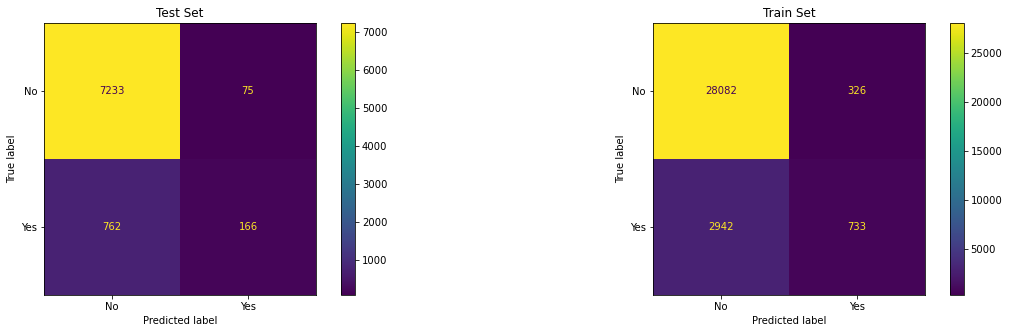

In [62]:
print('Accuracy - Test Set   : ', accuracy_score(y_test, ypred_logistic_test))
print('Accuracy - Train Set  : ', accuracy_score(y_outlier_clean, ypred_logistic_train))

print('Classification Report test: \n', classification_report(y_test, ypred_logistic_test), '\n')

print('Classification Report train: \n', classification_report(y_outlier_clean, ypred_logistic_train), '\n')

print('Cross Validation Logistic Regression---------------------')
print('Accuracy - All - Cross Validation  : ', acc_crosval_logistic)
print('Accuracy - Mean - Cross Validation : ', acc_crosval_logistic.mean())
print('Accuracy - Std - Cross Validation  : ', acc_crosval_logistic.std())
print('Accuracy - Range of train-Set       : ', (acc_crosval_logistic.mean()-acc_crosval_logistic.std()) , '-', (acc_crosval_logistic.mean()+acc_crosval_logistic.std()))

print('Confusion Matrix : \n')
fig, ax = plt.subplots(1,2,figsize=(20,5))
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, ypred_logistic_test),display_labels=['No', 'Yes'])
disp2 = ConfusionMatrixDisplay(confusion_matrix(y_outlier_clean, ypred_logistic_train),display_labels=['No', 'Yes'])
ax[0].set_title('Test Set')
ax[1].set_title('Train Set')
disp.plot(ax=ax[0], cmap='viridis')
disp2.plot(ax=ax[1], cmap='viridis')
plt.show()

didapatakan evaluasi skor mean 0.897 sama seperti akurasi pada train test. namun f1 score pada train dan test untuk yes masing-masing 0.28 dan 0.31 ini merupakan f1 score terkecil

### Evaluation SVM

prediksi svm dari model default

In [63]:
ypred_svm_train = clf_svm.predict(x_train_select)
ypred_svm_test = clf_svm.predict(x_test_select)

print summary evaluasi

Accuracy - Test Set   :  0.9015298688683827
Accuracy - Train Set  :  0.8983573855312782
Classification Report test: 
               precision    recall  f1-score   support

          no       0.91      0.99      0.95      7308
         yes       0.69      0.23      0.34       928

    accuracy                           0.90      8236
   macro avg       0.80      0.61      0.65      8236
weighted avg       0.88      0.90      0.88      8236
 

Classification Report train: 
               precision    recall  f1-score   support

          no       0.91      0.98      0.94     28408
         yes       0.66      0.23      0.34      3675

    accuracy                           0.90     32083
   macro avg       0.79      0.61      0.64     32083
weighted avg       0.88      0.90      0.88     32083
 

Cross Validation SVM---------------------
Accuracy - All - Cross Validation  :  [0.89387564 0.89870656 0.89761571 0.89713217 0.90180798]
Accuracy - Mean - Cross Validation :  0.897827612284545


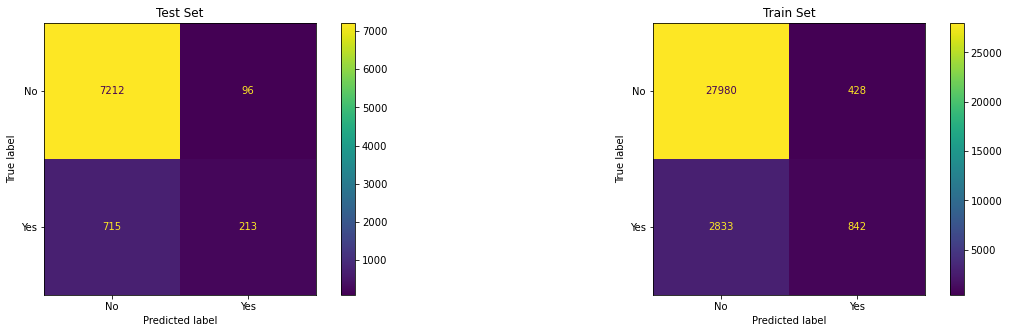

In [64]:
print('Accuracy - Test Set   : ', accuracy_score(y_test, ypred_svm_test))
print('Accuracy - Train Set  : ', accuracy_score(y_outlier_clean, ypred_svm_train))

print('Classification Report test: \n', classification_report(y_test, ypred_svm_test), '\n')
print('Classification Report train: \n', classification_report(y_outlier_clean, ypred_svm_train), '\n')

print('Cross Validation SVM---------------------')
print('Accuracy - All - Cross Validation  : ', acc_crosval_svm)
print('Accuracy - Mean - Cross Validation : ', acc_crosval_svm.mean())
print('Accuracy - Std - Cross Validation  : ', acc_crosval_svm.std())
print('Accuracy - Range of train-Set       : ', (acc_crosval_svm.mean()-acc_crosval_svm.std()) , '-', (acc_crosval_svm.mean()+acc_crosval_svm.std()))

print('Confusion Matrix : \n')
fig, ax = plt.subplots(1,2,figsize=(20,5))
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, ypred_svm_test),display_labels=['No', 'Yes'])
disp2 = ConfusionMatrixDisplay(confusion_matrix(y_outlier_clean, ypred_svm_train),display_labels=['No', 'Yes'])
ax[0].set_title('Test Set')
ax[1].set_title('Train Set')
disp.plot(ax=ax[0], cmap='viridis')
disp2.plot(ax=ax[1], cmap='viridis')
plt.show()

akurasi pada test set lebih besar sedikit daripad train set, dengan evaluasi 0.897 model ini hampir sama dengan logistic regression namun pada f1 score "yes" ini jauh lebih besar dengan masing-masing pada test dan train sama 0.34

### Evaluation Decision Tree

prediksi dengan decision tree parameter default

In [65]:
ypred_dt_train = clf_decision_tree.predict(x_train_select)
ypred_dt_test = clf_decision_tree.predict(x_test_select)

print summary evaluation

Accuracy - Test Set   :  0.8957017969888296
Accuracy - Train Set  :  0.91422248542842
Classification Report test: 
               precision    recall  f1-score   support

          no       0.91      0.98      0.94      7308
         yes       0.60      0.22      0.33       928

    accuracy                           0.90      8236
   macro avg       0.75      0.60      0.63      8236
weighted avg       0.87      0.90      0.87      8236
 

Classification Report train: 
               precision    recall  f1-score   support

          no       0.92      0.99      0.95     28408
         yes       0.81      0.33      0.47      3675

    accuracy                           0.91     32083
   macro avg       0.87      0.66      0.71     32083
weighted avg       0.91      0.91      0.90     32083
 

Cross Validation Decision Tree---------------------
Accuracy - All - Cross Validation  :  [0.89107059 0.89387564 0.89122643 0.89526185 0.8907419 ]
Accuracy - Mean - Cross Validation :  0.89243528

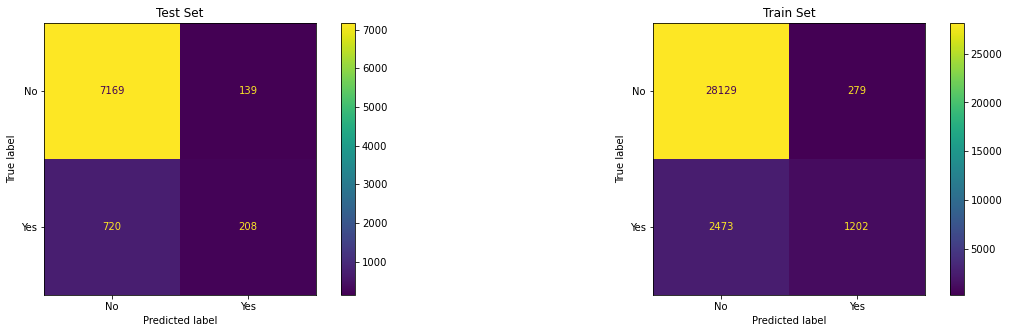

In [66]:
print('Accuracy - Test Set   : ', accuracy_score(y_test, ypred_dt_test))
print('Accuracy - Train Set  : ', accuracy_score(y_outlier_clean, ypred_dt_train))

print('Classification Report test: \n', classification_report(y_test, ypred_dt_test), '\n')
print('Classification Report train: \n', classification_report(y_outlier_clean, ypred_dt_train), '\n')

print('Cross Validation Decision Tree---------------------')
print('Accuracy - All - Cross Validation  : ', acc_crosval_decision_tree)
print('Accuracy - Mean - Cross Validation : ', acc_crosval_decision_tree.mean())
print('Accuracy - Std - Cross Validation  : ', acc_crosval_decision_tree.std())
print('Accuracy - Range of Train-Set       : ', (acc_crosval_decision_tree.mean()-acc_crosval_decision_tree.std()) , '-', (acc_crosval_decision_tree.mean()+acc_crosval_decision_tree.std()))

print('Confusion Matrix : \n')
fig, ax = plt.subplots(1,2,figsize=(20,5))
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, ypred_dt_test),display_labels=['No', 'Yes'])
disp2 = ConfusionMatrixDisplay(confusion_matrix(y_outlier_clean, ypred_dt_train),display_labels=['No', 'Yes'])
ax[0].set_title('Test Set')
ax[1].set_title('Train Set')
disp.plot(ax=ax[0], cmap='viridis')
disp2.plot(ax=ax[1], cmap='viridis')
plt.show()

didapatakn hasil evaluasi mean 0.8924 sedikit turun dari test accuracy score yang 0.91, namun untuk f1 score yes jauh lebih bagus daripada svm dengan skor tes dan train masing-masing 0.33 dan 0.47. model hampir sedikit overfit ke data train

### Evaluation Random Forest

prediksi dengan parameter random forest default

In [67]:
ypred_rf_train = clf_random_forest.predict(x_train_select)
ypred_rf_test = clf_random_forest.predict(x_test_select)

summary evaluation random forest

Accuracy - Test Set   :  0.8967945604662457
Accuracy - Train Set  :  0.9141913162734159
Classification Report test: 
               precision    recall  f1-score   support

          no       0.91      0.98      0.94      7308
         yes       0.60      0.26      0.36       928

    accuracy                           0.90      8236
   macro avg       0.75      0.62      0.65      8236
weighted avg       0.88      0.90      0.88      8236
 

Classification Report train: 
               precision    recall  f1-score   support

          no       0.92      0.99      0.95     28408
         yes       0.77      0.36      0.49      3675

    accuracy                           0.91     32083
   macro avg       0.85      0.67      0.72     32083
weighted avg       0.90      0.91      0.90     32083
 

Cross Validation Random Forest---------------------
Accuracy - All - Cross Validation  :  [0.89294063 0.895434   0.89138227 0.89495012 0.8938591 ]
Accuracy - Mean - Cross Validation :  0.893713

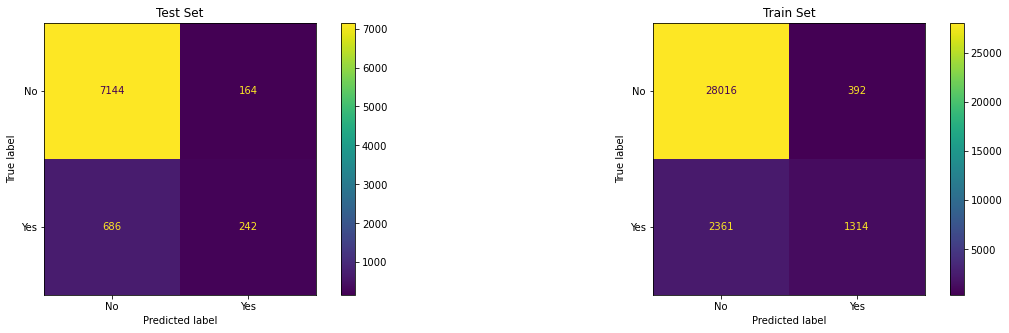

In [68]:
print('Accuracy - Test Set   : ', accuracy_score(y_test, ypred_rf_test))
print('Accuracy - Train Set  : ', accuracy_score(y_outlier_clean, ypred_rf_train))

print('Classification Report test: \n', classification_report(y_test, ypred_rf_test), '\n')
print('Classification Report train: \n', classification_report(y_outlier_clean, ypred_rf_train), '\n')

print('Cross Validation Random Forest---------------------')
print('Accuracy - All - Cross Validation  : ', acc_crosval_random_forest)
print('Accuracy - Mean - Cross Validation : ', acc_crosval_random_forest.mean())
print('Accuracy - Std - Cross Validation  : ', acc_crosval_random_forest.std())
print('Accuracy - Range of Train-Set       : ', (acc_crosval_random_forest.mean()-acc_crosval_random_forest.std()) , '-', (acc_crosval_random_forest.mean()+acc_crosval_random_forest.std()))

print('Confusion Matrix : \n')
fig, ax = plt.subplots(1,2,figsize=(20,5))
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, ypred_rf_test),display_labels=['No', 'Yes'])
disp2 = ConfusionMatrixDisplay(confusion_matrix(y_outlier_clean, ypred_rf_train),display_labels=['No', 'Yes'])
ax[0].set_title('Test Set')
ax[1].set_title('Train Set')
disp.plot(ax=ax[0], cmap='viridis')
disp2.plot(ax=ax[1], cmap='viridis')
plt.show()

random forest dikenal sebagai model yang sering overfit, namun pada dataset ini accuracy score tidak timpang antara test dan train. hasil cross validation mendpatkan nilai 0.8937, dengan f1 score yes yang lebih baik daripada decision tree yang masing-masing 0.36 dan 0.49

### Evaluation KNN

prediksi dengan knn parameter default

In [69]:
ypred_knn_train = clf_knn.predict(x_train_select)
ypred_knn_test = clf_knn.predict(x_test_select)

print summary evaluation knn

Accuracy - Test Set   :  0.8940019426906265
Accuracy - Train Set  :  0.9051834304771997
Classification Report test: 
               precision    recall  f1-score   support

          no       0.91      0.97      0.94      7308
         yes       0.56      0.28      0.37       928

    accuracy                           0.89      8236
   macro avg       0.74      0.63      0.66      8236
weighted avg       0.87      0.89      0.88      8236
 

Classification Report train: 
               precision    recall  f1-score   support

          no       0.92      0.98      0.95     28408
         yes       0.67      0.34      0.45      3675

    accuracy                           0.91     32083
   macro avg       0.79      0.66      0.70     32083
weighted avg       0.89      0.91      0.89     32083
 

Cross Validation KNN---------------------
Accuracy - All - Cross Validation  :  [0.86894187 0.89138227 0.89060309 0.89198878 0.88793641]
Accuracy - Mean - Cross Validation :  0.8861704823184364

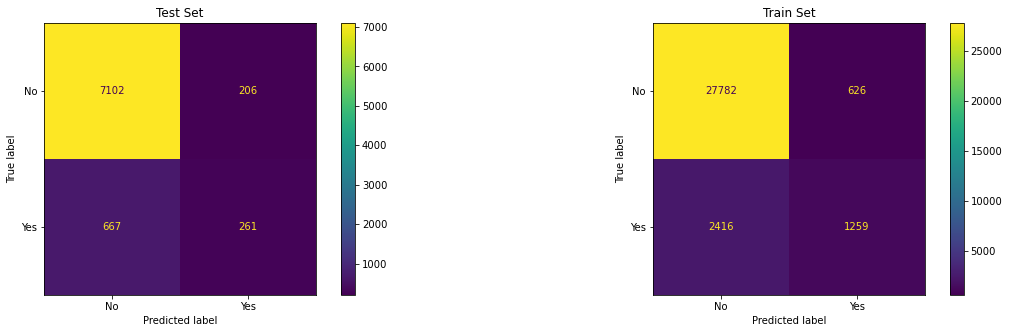

In [70]:
print('Accuracy - Test Set   : ', accuracy_score(y_test, ypred_knn_test))
print('Accuracy - Train Set  : ', accuracy_score(y_outlier_clean, ypred_knn_train))

print('Classification Report test: \n', classification_report(y_test, ypred_knn_test), '\n')
print('Classification Report train: \n', classification_report(y_outlier_clean, ypred_knn_train), '\n')

print('Cross Validation KNN---------------------')
print('Accuracy - All - Cross Validation  : ', acc_crosval_knn)
print('Accuracy - Mean - Cross Validation : ', acc_crosval_knn.mean())
print('Accuracy - Std - Cross Validation  : ', acc_crosval_knn.std())
print('Accuracy - Range of train-set      : ', (acc_crosval_knn.mean()-acc_crosval_knn.std()) , '-', (acc_crosval_knn.mean()+acc_crosval_knn.std()))

print('Confusion Matrix : \n')
fig, ax = plt.subplots(1,2,figsize=(20,5))
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, ypred_knn_test),display_labels=['No', 'Yes'])
disp2 = ConfusionMatrixDisplay(confusion_matrix(y_outlier_clean, ypred_knn_train),display_labels=['No', 'Yes'])
ax[0].set_title('Test Set')
ax[1].set_title('Train Set')
disp.plot(ax=ax[0], cmap='viridis')
disp2.plot(ax=ax[1], cmap='viridis')
plt.show()

berbeda halnya dengan knn. untuk f1 score yes nya ini yang terbaik masing-masing 0.37 dan 0.45 namun accuracy score biasa saja. bila diliat dari cross validation hanya dapat nilai 0.886. 

### Evaluation Naive Bayes

prediksi naive bayes parameter default

In [71]:
ypred_nb_train = clf_gaussian_nb.predict(x_train_select)
ypred_nb_test = clf_gaussian_nb.predict(x_test_select)

summary evaluation naive bayes

Accuracy - Test Set   :  0.8173870811073336
Accuracy - Train Set  :  0.8144500202599507
Classification Report test: 
               precision    recall  f1-score   support

          no       0.92      0.87      0.89      7308
         yes       0.28      0.40      0.33       928

    accuracy                           0.82      8236
   macro avg       0.60      0.63      0.61      8236
weighted avg       0.85      0.82      0.83      8236
 

Classification Report train: 
               precision    recall  f1-score   support

          no       0.92      0.86      0.89     28408
         yes       0.29      0.43      0.34      3675

    accuracy                           0.81     32083
   macro avg       0.61      0.65      0.62     32083
weighted avg       0.85      0.81      0.83     32083
 

Cross Validation Gaussian NB---------------------
Accuracy - All - Cross Validation  :  [0.80847748 0.81985351 0.82234689 0.80985037 0.81156484]
Accuracy - Mean - Cross Validation :  0.81441861

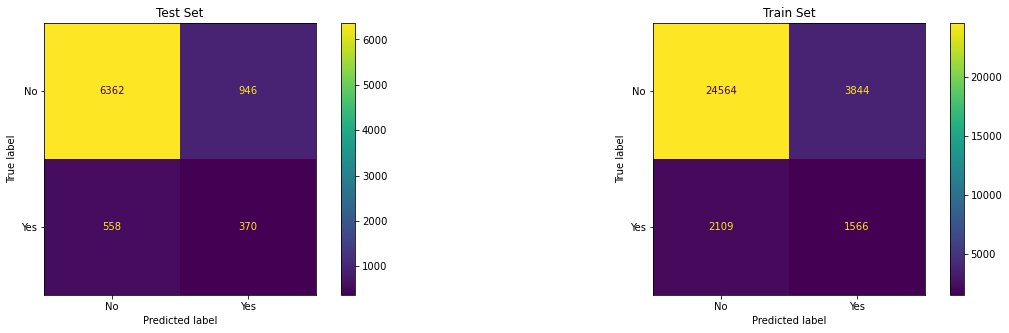

In [72]:
print('Accuracy - Test Set   : ', accuracy_score(y_test, ypred_nb_test))
print('Accuracy - Train Set  : ', accuracy_score(y_outlier_clean, ypred_nb_train))

print('Classification Report test: \n', classification_report(y_test, ypred_nb_test), '\n')
print('Classification Report train: \n', classification_report(y_outlier_clean, ypred_nb_train), '\n')

print('Cross Validation Gaussian NB---------------------')
print('Accuracy - All - Cross Validation  : ', acc_crosval_gaussian_nb)
print('Accuracy - Mean - Cross Validation : ', acc_crosval_gaussian_nb.mean())
print('Accuracy - Std - Cross Validation  : ', acc_crosval_gaussian_nb.std())
print('Accuracy - Range of train-set      : ', (acc_crosval_gaussian_nb.mean()-acc_crosval_gaussian_nb.std()) , '-', (acc_crosval_gaussian_nb.mean()+acc_crosval_gaussian_nb.std()))

print('Confusion Matrix : \n')
fig, ax = plt.subplots(1,2,figsize=(20,5))
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, ypred_nb_test),display_labels=['No', 'Yes'])
disp2 = ConfusionMatrixDisplay(confusion_matrix(y_outlier_clean, ypred_nb_train),display_labels=['No', 'Yes'])
ax[0].set_title('Test Set')
ax[1].set_title('Train Set')
disp.plot(ax=ax[0], cmap='viridis')
disp2.plot(ax=ax[1], cmap='viridis')
plt.show()

pada naive bayes didapatkan cross validation 0.814 dengan f1 score no lebih kecil daripada model sebelumnya yaitu 0.89 namun f1 score yes cukup baik di nilai 0.37

### Evaluation Catboost

prediksi dengan model catboost parameter default

In [73]:
ypred_catboost_train = clf_catboost.predict(x_train_select)
ypred_catboost_test = clf_catboost.predict(x_test_select)

summary evaluation catboost

Accuracy - Test Set   :  0.8980087421078193
Accuracy - Train Set  :  0.9087055449926752
Classification Report test: 
               precision    recall  f1-score   support

          no       0.91      0.98      0.94      7308
         yes       0.63      0.23      0.34       928

    accuracy                           0.90      8236
   macro avg       0.77      0.61      0.64      8236
weighted avg       0.88      0.90      0.88      8236
 

Classification Report train: 
               precision    recall  f1-score   support

          no       0.92      0.99      0.95     28408
         yes       0.75      0.30      0.43      3675

    accuracy                           0.91     32083
   macro avg       0.83      0.65      0.69     32083
weighted avg       0.90      0.91      0.89     32083
 

Cross Validation catboost---------------------
Accuracy - All - Cross Validation  :  [0.89621318 0.90119994 0.89995325 0.89619701 0.89775561]
Accuracy - Mean - Cross Validation :  0.89826379780

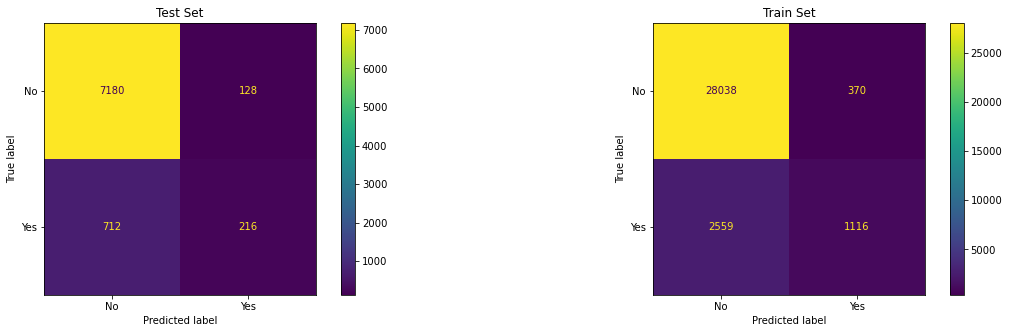

In [74]:
print('Accuracy - Test Set   : ', accuracy_score(y_test, ypred_catboost_test))
print('Accuracy - Train Set  : ', accuracy_score(y_outlier_clean, ypred_catboost_train))

print('Classification Report test: \n', classification_report(y_test, ypred_catboost_test), '\n')
print('Classification Report train: \n', classification_report(y_outlier_clean, ypred_catboost_train), '\n')

print('Cross Validation catboost---------------------')
print('Accuracy - All - Cross Validation  : ', acc_crosval_catboost)
print('Accuracy - Mean - Cross Validation : ', acc_crosval_catboost.mean())
print('Accuracy - Std - Cross Validation  : ', acc_crosval_catboost.std())
print('Accuracy - Range of train-set      : ', (acc_crosval_catboost.mean()-acc_crosval_catboost.std()) , '-', (acc_crosval_catboost.mean()+acc_crosval_catboost.std()))

print('Confusion Matrix : \n')
fig, ax = plt.subplots(1,2,figsize=(20,5))
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, ypred_catboost_test),display_labels=['No', 'Yes'])
disp2 = ConfusionMatrixDisplay(confusion_matrix(y_outlier_clean, ypred_catboost_train),display_labels=['No', 'Yes'])
ax[0].set_title('Test Set')
ax[1].set_title('Train Set')
disp.plot(ax=ax[0], cmap='viridis')
disp2.plot(ax=ax[1], cmap='viridis')
plt.show()

didapatkan skor cross validation catboost tertinggi 0.898, dengan f1 score yes yang cukup 0.34 dan 0.43 pada data test dan train. selanjutnya akan dipilih model terbaik dilihat dari mean cross validation terbaik

### Summary Cross validation

In [75]:
print(f'cross validation logistic regression :  {acc_crosval_logistic.mean():.4%}')
print(f'cross validation svm :  {acc_crosval_svm.mean():.4%}')
print(f'cross validation decision tree :  {acc_crosval_decision_tree.mean():.4%}')
print(f'cross validation random forest :  {acc_crosval_random_forest.mean():.4%}')
print(f'cross validation knn :  {acc_crosval_knn.mean():.4%}')
print(f'cross validation gaussian nb :  {acc_crosval_gaussian_nb.mean():.4%}')
print(f'cross validation catboost :  {acc_crosval_catboost.mean():.4%}')

cross validation logistic regression :  89.8139%
cross validation svm :  89.7828%
cross validation decision tree :  89.2435%
cross validation random forest :  89.3713%
cross validation knn :  88.6170%
cross validation gaussian nb :  81.4419%
cross validation catboost :  89.8264%


bila dilihat dari mean nya saja didapatkan nilai yang paling tingi ada pada Catboost 89.826% beda sangat tipis dengan SVM dan logistic regresion yang berada di 89.78% dan 89.81% dikarenakan saya hanya mengambil satu model terbaik saja untuk dilakukan hyperparameter tuning maka Catboost akan diambil.

bila dilihat akurasi pada test dan train semua model ada pada kisaran nilai 0.88-0.90 sehingga model cenderung tidak overfit. untuk f1 score, rata-rata model akan sangat baik dalam memprediksi "no" dan model akan kurang baik dalam memprediksi "yes". selanjutnya kita akan optimasi dengan mencari hyperparameter terbaik dari model terbaik yaitu catboost dengan menggunakan gridsearch.



menurut Ilemobayo, 2020 dalam artikel "Model Hyperparameter Tuning and Optimization(CatBoost)" parameter yang dilakukan grid search ada n_estimator dan max_depth. saya mengambil kedua hyperparameter tersebut untuk dilakukan grid search. sebenarnya masih banyak hyperparameter yang bisa dilakukan terhadap catboost, namun resource yang digunakan akan semakin besar pula, maka untuk memudahkan adalah menggunakan parameter yang orang lain lakukan. pada kali ini oleh Ilemobayo. 

In [91]:
grid_param = {'n_estimators': [100,200,300],
                'max_depth': [3, 5, 7],
                'custom_metric': ['Logloss'] }
                

catboost_GS = GridSearchCV(CatBoostClassifier(random_state=1,verbose=0),
                            param_grid=grid_param,
                            scoring='accuracy',
                            cv=5,
                            n_jobs=3,
                            verbose=0)

dilakukan transform pada x_train yang diselect featurenya menggunakan transformer preprocessor

In [92]:
x_train_transform = preprocessor.fit_transform(x_train_select)

melakukan machine learing fit pada x_train menggunakan grid search

In [93]:
catboost_gs_fit = catboost_GS.fit(x_train_transform, y_outlier_clean)

setelah dilakukan fitting grid search didapatak nilai  {'custom_metric': 'Logloss', 'max_depth': 5, 'n_estimators': 100} sebagai best parameter, namun skor 0.8987 

In [94]:
print('score best parameters : ', catboost_gs_fit.best_score_)
print('best parameters : ', catboost_gs_fit.best_params_)

score best parameters :  0.8990118740471559
best parameters :  {'custom_metric': 'Logloss', 'max_depth': 5, 'n_estimators': 100}


setelah mengetahui parameter terbaik maka langkah selanjutnya adalah membuat model terbaik dari hasil parameter tuning terbaik

In [106]:
clf_catboost_best = Pipeline([('preprocessor', preprocessor),
                            ('catboost', CatBoostClassifier(random_state=1,**catboost_gs_fit.best_params_,verbose=0))])

clf_catboost_best = clf_catboost_best.fit(x_train_select, y_outlier_clean)

kemudian predict data test dan train dengan menggunakan model catboost terbaik

In [107]:
y_pred_best_test = clf_catboost_best.predict(x_test_select)
y_pred_best_train = clf_catboost_best.predict(x_train_select)

dilakukan evaluasi model before dan after hyperparameter tuning

--------------- before -----------------
Accuracy - Test Set   :  0.8980087421078193
Accuracy - Train Set  :  0.9087055449926752
Classification Report test: 
               precision    recall  f1-score   support

          no       0.91      0.98      0.94      7308
         yes       0.63      0.23      0.34       928

    accuracy                           0.90      8236
   macro avg       0.77      0.61      0.64      8236
weighted avg       0.88      0.90      0.88      8236
 

Classification Report train: 
               precision    recall  f1-score   support

          no       0.92      0.99      0.95     28408
         yes       0.75      0.30      0.43      3675

    accuracy                           0.91     32083
   macro avg       0.83      0.65      0.69     32083
weighted avg       0.90      0.91      0.89     32083
 

Confusion Matrix : 



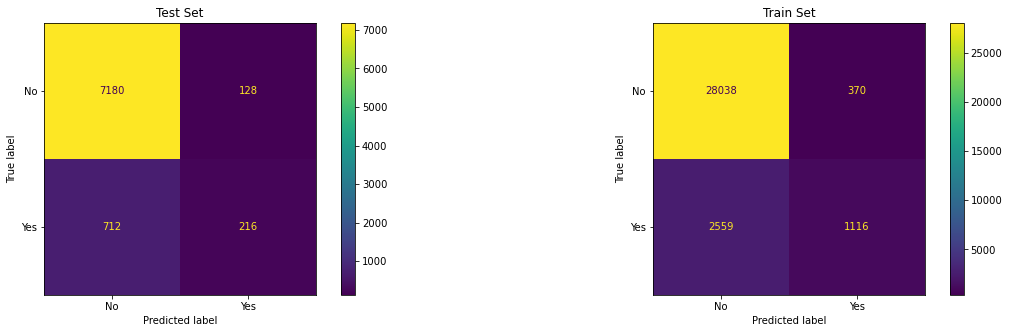

In [108]:
print('--------------- before -----------------')
print('Accuracy - Test Set   : ', accuracy_score(y_test, ypred_catboost_test))
print('Accuracy - Train Set  : ', accuracy_score(y_outlier_clean, ypred_catboost_train))
print('Classification Report test: \n', classification_report(y_test, ypred_catboost_test), '\n')
print('Classification Report train: \n', classification_report(y_outlier_clean, ypred_catboost_train), '\n')
print('Confusion Matrix : \n')
fig, ax = plt.subplots(1,2,figsize=(20,5))
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, ypred_catboost_test),display_labels=['No', 'Yes'])
disp2 = ConfusionMatrixDisplay(confusion_matrix(y_outlier_clean,ypred_catboost_train),display_labels=['No', 'Yes'])
ax[0].set_title('Test Set')
ax[1].set_title('Train Set')
disp.plot(ax=ax[0], cmap='viridis')
disp2.plot(ax=ax[1], cmap='viridis')
plt.show()

--------------------after-----------------
Accuracy - Test Set best parameter  :  0.9004371053909664
Accuarcy - Train Set best parameter :  0.9036561418819936 

Classification Report best parameter test: 
               precision    recall  f1-score   support

          no       0.91      0.98      0.95      7308
         yes       0.65      0.25      0.36       928

    accuracy                           0.90      8236
   macro avg       0.78      0.62      0.65      8236
weighted avg       0.88      0.90      0.88      8236
 

Classification Report best parameter train: 
               precision    recall  f1-score   support

          no       0.91      0.98      0.95     28408
         yes       0.69      0.28      0.40      3675

    accuracy                           0.90     32083
   macro avg       0.80      0.63      0.68     32083
weighted avg       0.89      0.90      0.89     32083
 

Confusion Matrix : 



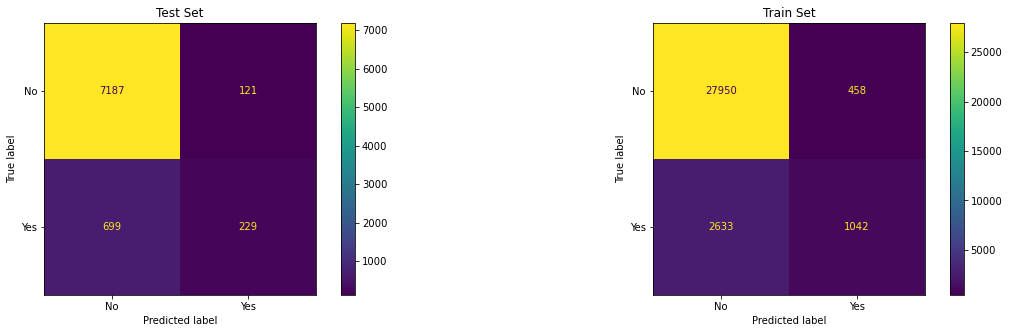

In [109]:
print('--------------------after-----------------')
print('Accuracy - Test Set best parameter  : ', accuracy_score(y_test, y_pred_best_test))
print('Accuarcy - Train Set best parameter : ', accuracy_score(y_outlier_clean,y_pred_best_train),'\n')
print('Classification Report best parameter test: \n', classification_report(y_test, y_pred_best_test), '\n')
print('Classification Report best parameter train: \n', classification_report(y_outlier_clean, y_pred_best_train), '\n')

print('Confusion Matrix : \n')
fig, ax = plt.subplots(1,2,figsize=(20,5))
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_best_test),display_labels=['No', 'Yes'])
disp2 = ConfusionMatrixDisplay(confusion_matrix(y_outlier_clean, y_pred_best_train),display_labels=['No', 'Yes'])
ax[0].set_title('Test Set')
ax[1].set_title('Train Set')
disp.plot(ax=ax[0], cmap='viridis')
disp2.plot(ax=ax[1], cmap='viridis')
plt.show()

seklias dari accuracy score semakin baik antara sebelum dan sesudah hyperparameter tuning. bila dilihat dari confusion matrix, model setelah hyperparameter tuning menjadi lebih baik dalam memprekdisi no, dengan improvement klasifikasi no nya. kekurangannya yaitu model kurang baik memprediksi klasifikasi yes .


menurut saya dalam telemarketing untuk seseorang dihubungi dan ditawarkan deposito berjangka. model ini menurut saya cukup baik. karena tujuan dari pembuatan pemodelan adalah untuk mengefisienkan orang yang ditelpon agar lebih lancar dalam closing transaksi. 

bila dilihat dilihat dari contoh confusion matrix train dengan model catboost terbaik dari confusion matrix apabila telemarketer menggunakan model ini dalam mencari costumernya maka terlemarketer tersebut hanya akan bisa closing 1042 costumer, sedangkan 2633 costumer lainnya, model salah menafsirkan orang tersebut. model memprediksi bahwa 458 orang itu menghasilkan no. sehingga terjadi loss yang cukup besar untuk mendapatkan potential costumer. bila hanya mengikuti suggestion model ini telemarketer akan menemui sekitar 2633 orang yang dihubungi tapi tidak akan membeli deposito berjangka.

jumlah ini cukup banyak tapi managable. bila ada 32000 kontak yang harus dihubungi oleh telemarketer waktunya akan sangat lama, tapi bila diaplikasikan model ini sebelum telemarketer menelpon maka akan ada save waktu yang cukup banyak karena dari 3675 kontak yang di telfon meskipun ada 2633 yang menolak tapi ada 1042 yang bisa closing. perbandingannya sekitar 1:2 atau dengan kasarnya setiap 2 kali telfon akan ada 1 yang akan closing. 

untuk melakukan perbandingan lebih dalam  kita akan melakukan cross validation pada model terbaik dengan melakukan test pada train data

In [110]:
acc_crosval_catboost_best = cross_val_score(clf_catboost_best,x_train_select,y_outlier_clean,cv=5)

didapatkan kenaikan skor akurasi cross validation sebesar 0.0499% setelah dilakukan hyperparameter tuning

In [111]:
print(f'cross validation catboost  Before:  {acc_crosval_catboost.mean():.4%}')
print(f'cross validation catboost best parameter :  {acc_crosval_catboost_best.mean():.4%}')
print(f'delta mean cross validation before-after {acc_crosval_catboost_best.mean()-acc_crosval_catboost.mean():.4%}')

cross validation catboost  Before:  89.8264%
cross validation catboost best parameter :  89.9012%
delta mean cross validation before-after 0.0748%


## IX. Model Inference

model inference dilakukan untuk mencoba menguji model dengan data baru diluar dari data train dan test split. data inference disimulasikan bahwa ada data baru yang akan di predict dari model yang sudah dibuat.

show data inference

In [112]:
data_inf

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,32,blue-collar,married,basic.9y,unknown,yes,yes,cellular,may,mon,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,no
1,33,blue-collar,single,basic.6y,unknown,yes,yes,cellular,jul,fri,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
2,25,self-employed,divorced,university.degree,no,yes,no,cellular,apr,mon,...,5,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,yes
3,34,blue-collar,single,high.school,no,yes,no,cellular,may,fri,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
4,53,technician,married,professional.course,no,yes,no,cellular,nov,fri,...,7,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no
5,46,services,married,basic.9y,no,no,yes,cellular,may,wed,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1,no
6,33,technician,single,professional.course,no,yes,no,cellular,may,fri,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
7,46,technician,married,high.school,no,yes,no,cellular,nov,mon,...,1,999,1,failure,-0.1,93.200,-42.0,4.191,5195.8,no
8,42,technician,married,professional.course,unknown,no,no,telephone,may,wed,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no
9,30,services,single,high.school,no,yes,no,cellular,may,fri,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.250,5099.1,no


mengambil feature yang dibutuhkan dari data inference

In [113]:
data_inf_select = data_inf[num_select+cat_select]
data_inf_select

,emp.var.rate,euribor3m,nr.employed,cons.price.idx,previous,contact,poutcome
0,-1.8,1.244,5099.1,92.893,0,cellular,nonexistent
1,1.4,4.963,5228.1,93.918,0,cellular,nonexistent
2,-1.8,1.405,5099.1,93.075,0,cellular,nonexistent
3,-1.8,1.313,5099.1,92.893,0,cellular,nonexistent
4,-0.1,4.021,5195.8,93.200,0,cellular,nonexistent
5,-1.8,1.334,5099.1,92.893,0,cellular,nonexistent
6,-1.8,1.313,5099.1,92.893,0,cellular,nonexistent
7,-0.1,4.191,5195.8,93.200,1,cellular,failure
8,1.1,4.859,5191.0,93.994,0,telephone,nonexistent
9,-1.8,1.250,5099.1,92.893,0,cellular,nonexistent


prediksi dengan catboost terbaik

In [114]:
y_pred_inf = clf_catboost_best.predict(data_inf_select)

hasil dari prediksi

In [115]:
y_pred_inf

array(['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no'],
      dtype=object)

## X. Pengambilan Kesimpulan

setelah dilakukan crossvalidation maka dibandingkan kesetiap modelnya:
- Score Logistic Regression : 89.81%
- Score SVM : 89.84%
- Score Decision Tree : 91.42%
- Score Random Forest : 91.42%
- Score KNN : 90.52%
- Score Gaussian NB : 81.45%
- Score catboost : 90.87%

---

- model dengan cross validation terbaik adalah catboost dengan nilai 89.8295%, maka diambil model catboost untuk dilakukan hyperparameter tuning
- model mendapatkan parameter terbaik yaitu {'custom_metric': 'Logloss', 'max_depth': 5, 'n_estimators': 100} dengan improvement akurasi sebesar 0.0499%
- feature yang diambil untuk model adalah 'emp.var.rate','euribor3m','nr.employed','cons.price.idx','previous','contact', dan 'poutcome'

Dijelaskan sebelumnya bila dilihat dari contoh confusion matrix train dengan model catboost terbaik apabila telemarketer menggunakan model ini dalam mencari costumernya maka terlemarketer tersebut hanya akan bisa closing 1042 costumer, sedangkan 2633 costumer lainnya, model salah menafsirkan orang tersebut. model memprediksi bahwa 458 orang itu menghasilkan no. sehingga terjadi loss yang cukup besar untuk mendapatkan potential costumer. bila hanya mengikuti suggestion model ini telemarketer akan menemui sekitar 2633 orang yang dihubungi tapi tidak akan membeli deposito berjangka. jumlah ini cukup banyak tapi managable. bila ada 32000 kontak yang harus dihubungi oleh telemarketer waktunya akan sangat lama, tapi bila diaplikasikan model ini sebelum telemarketer menelpon maka akan ada save waktu yang cukup banyak karena dari 3675 kontak yang di telfon meskipun ada 2633 yang menolak tapi ada 1042 yang bisa closing.

**bila dihitung secara kasar** angka ini dengan kata lain bahwa bila menelfon sesuai dengan suggestion model maka akan ada kurang lebih 1 diantara 2-4 telfon yang dikontak akan ada 1 orang yang bisa dilakukan closing berlangganan deposito berjangka. bila diasumsikan bahwa seorang telemarketer bisa menelpon sebanyak 5 kali 1 jam dan 8 jam per hari maka akan ada 40 telefon dan bila probabilitasnya 1:4 maka kemungkinan telemarketer tersebut bisa closing +-10 costumer pada hari itu saja. ini sangat baik mengingat telemarketer bila mendapat 1-2 customer sehari saja itu sudah cukup baik.

kekurangannya adalah data yang dibutuhkan sangatlah banyak, contohnya saja data train ini +- 32000 baris data kemudian model akan memprediksi +-3600 baris data yang worth untuk dihubungi karena akan diprediksi "yes". hampir 90 persen data yang dikumpulkan tidak akan dikontak. atau kecil kemungkinannya untuk dapat closing.

tetapi model ini menggunakan feature external yang cukup banyak yaitu 'emp.var.rate','euribor3m','nr.employed','cons.price.idx'
- emp.var.rate didapatkan dari employment variation rate dari quarterly indicator yang didapatkan dari pemerintah
- euribor3m didaptakan dari rata rata interest rate antar bank eropa yang di persiapkan untuk ditransaksi/pinjamkan antar banknya
- nr.employed didapatkan dari indikator employment rate yang didapatkan dari pemerintah
- cons.price.idx ada indikator consumer price yang didapatkan dari pemerintah

yang bank bisa kontrol adalah feature ini:
- previous didapatakan dari berapa kali kontak sebelum kampanye marketing untuk orang yang sama
- jenis contact didapatakan dari bagaimana telemarketer mengkontak dari telfon kabel atau HP
- poutcome didapatakan dari bagaimana kampanye marketing sebelumnya

bila divisualisasikan proporsi contact, previos dan poutcome yang bisa menghasilkan berlangganan deposito akan menjadi seperti ini.

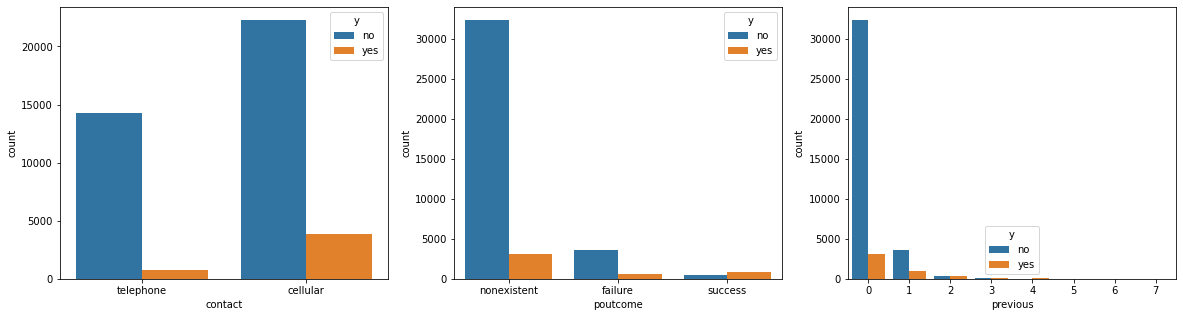

In [116]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
sns.countplot(x='contact',data=bank_df,hue='y',ax=ax[0])
sns.countplot(x='poutcome',data=bank_df,hue='y',ax=ax[1])
sns.countplot(x='previous',data=bank_df,hue='y',ax=ax[2])
plt.show()

>maka suggestion untuk bank adalah perbanyak data dengan kontak cellular karena kemungkinan untuk closing penjualan deposito akan semakin besar, kemudian untuk marketing harus melakukan  kampanye produk deposito yang sukses agar memperbesar kemungkinan closing penjualan depositonya. bila dilihat dari barchart kampanye marketing yang sukses akan semakin banyak orang yang berlangganan. meskipun jumalah nonexistent marketing lebih besar yang berlanggaan namun rasio dengan tidak berlangganan jauh lebih besar juga. dan untuk telemarketer jika memungkinkan untuk mengkontak calon pelanggan lebih dari sekali, kemungkinan orang tersebut akan berlangganan deposito.

## XI. Referensi

Ilemobayo, Justus., 2020, Model Hyperparameter Tuning and Optimization(CatBoost)., AI+Club OAU., Retrived From https://medium.com/aiplusoau/hyperparameter-tuning-a5fe69d2a6c7

Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011., citation link https://jmlr.csail.mit.edu/papers/v12/pedregosa11a.html

Wu, Jun., 2019, Handling Missing Data for a Beginner., Towards Data Science., Retrived From https://towardsdatascience.com/handling-missing-data-for-a-beginner-6d6f5ea53436

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

[1] Quartiles, Boxes, and Whiskers., purplemath.com, Retrived from https://www.purplemath.com/modules/boxwhisk.htm

[2] Korelasi Pearson., rumusstatistik.com, Retrived From https://www.rumusstatistik.com/2019/06/korelasi-pearson.html#:~:text=Koefisien%20korelasi%20bertanda%20negatif%20artinya,nilai%20variabel%20y%20semakin%20tinggi.

---










